In [ ]:
#data analysis with python

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import mplcyberpunk
import warnings

plt.style.use("cyberpunk")
pd.set_option("max_columns", 100) 
pd.set_option("max_rows", 100)

warnings.filterwarnings("ignore")

In [2]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.0
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["axes.titlesize"] = 25
mpl.rcParams["axes.labelsize"] = 23
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5.0
mpl.rcParams["axes.titlepad"] = 10.0
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

In [3]:
train = pd.read_csv("train_titanic.csv")
test = pd.read_csv("test_titanic.csv")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
pd.DataFrame({"null/train":(train.isnull().sum()/train.shape[0])*100,
              "null/test": (test.isnull().sum()/test.shape[0])*100}).sort_values("null/train", ascending=False) 

,null/train,null/test
Cabin,77.104377,78.229665
Age,19.865320,20.574163
Embarked,0.224467,0.000000
Fare,0.000000,0.239234
Name,0.000000,0.000000
Parch,0.000000,0.000000
PassengerId,0.000000,0.000000
Pclass,0.000000,0.000000
Sex,0.000000,0.000000
SibSp,0.000000,0.000000


In [88]:
train.duplicated().sum()

0

0    0.616162
1    0.383838
Name: Survived, dtype: float64

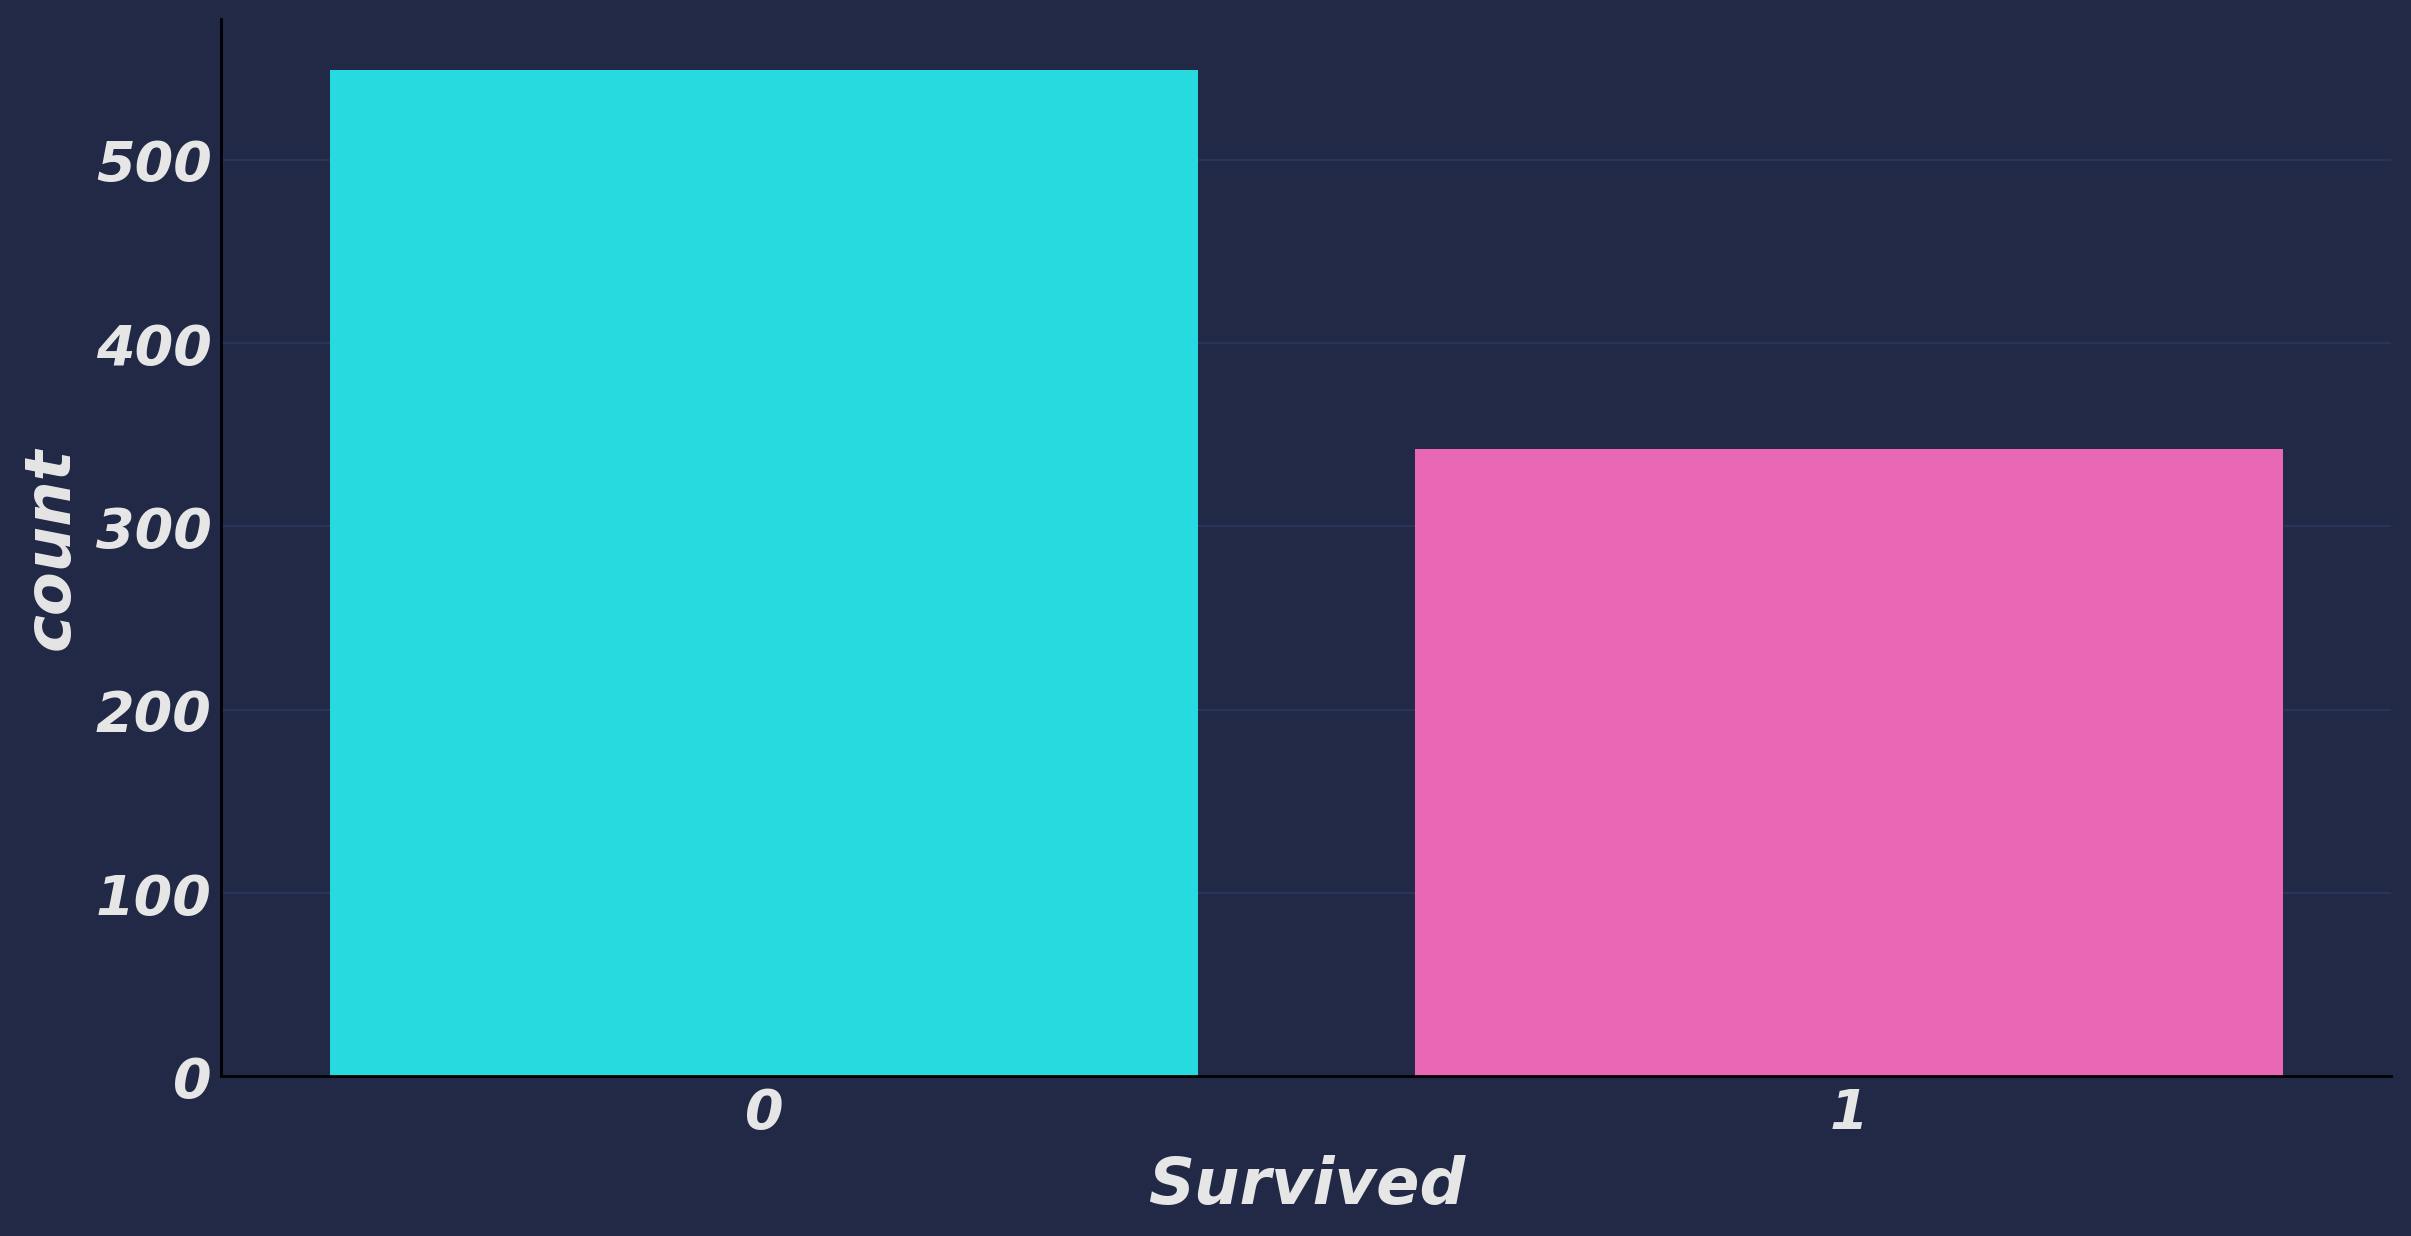

In [9]:
#target

plt.figure(figsize=(14,7))
sns.countplot(train.Survived)

train.Survived.value_counts(normalize=True) 

In [10]:
cater = train.select_dtypes(exclude="number")
number = train.select_dtypes("number")

In [76]:
# categorical features

In [31]:
cater.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Markun, Mr. Johann",male,347082,B96 B98,S
freq,1,577,7,4,644


In [50]:
cater.sample(10)

,Name,Sex,Ticket,Cabin,Embarked
818,"Holm, Mr. John Fredrik Alexander",male,C 7075,NaN,S
491,"Windelov, Mr. Einar",male,SOTON/OQ 3101317,NaN,S
530,"Quick, Miss. Phyllis May",female,26360,NaN,S
720,"Harper, Miss. Annie Jessie ""Nina""",female,248727,NaN,S
481,"Frost, Mr. Anthony Wood ""Archie""",male,239854,NaN,S
679,"Cardeza, Mr. Thomas Drake Martinez",male,PC 17755,B51 B53 B55,C
548,"Goldsmith, Mr. Frank John",male,363291,NaN,S
343,"Sedgwick, Mr. Charles Frederick Waddington",male,244361,NaN,S
496,"Eustis, Miss. Elizabeth Mussey",female,36947,D20,C
595,"Van Impe, Mr. Jean Baptiste",male,345773,NaN,S


In [ ]:
#name

In [6]:
title_train = cater["Name"].str.split(",",expand=True)[1].str.split(expand=True)[0].str.rstrip(".") 

In [7]:
title_test = test["Name"].str.split(",",expand=True)[1].str.split(expand=True)[0].str.rstrip(".") 

In [8]:
print("title_train")
print(title_train.unique()) 
print(30*"-")
print("title_test")
print(title_test.unique()) 

title_train
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the' 'Jonkheer']
------------------------------
title_test
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [11]:
#ganti title name yang tidak pantas 

name_map = {'Mlle': 'Miss', 
           'Ms': 'Miss', 
           'Mme': 'Mrs',
           'Major': 'Other', 
           'Col': 'Other', 
           'Dr' : 'Other', 
           'Rev' : 'Other',
           'Capt': 'Other', 
           'Jonkheer': 'Other',
           'Sir': 'Other', 
           'Lady': 'Other', 
           'Don': 'Other', 
           'Countess': 'Other', 
           'Dona': 'Other',
           'the': 'Other'}

In [12]:
for i in [train,test]:
    i["title_name"] = i["Name"].str.split(",",expand=True)[1].str.split(expand=True)[0].str.rstrip(".")
    i["title_name"] = i["title_name"].replace(name_map) 

In [8]:
train.title_name.value_counts() 

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: title_name, dtype: int64

In [61]:
train.groupby("title_name")["Survived"].value_counts(normalize=True).to_frame()

Survived
title_name Survived          
Master     1         0.575000
           0         0.425000
Miss       1         0.702703
           0         0.297297
Mr         0         0.843327
           1         0.156673
Mrs        1         0.793651
           0         0.206349
Other      0         0.652174
           1         0.347826

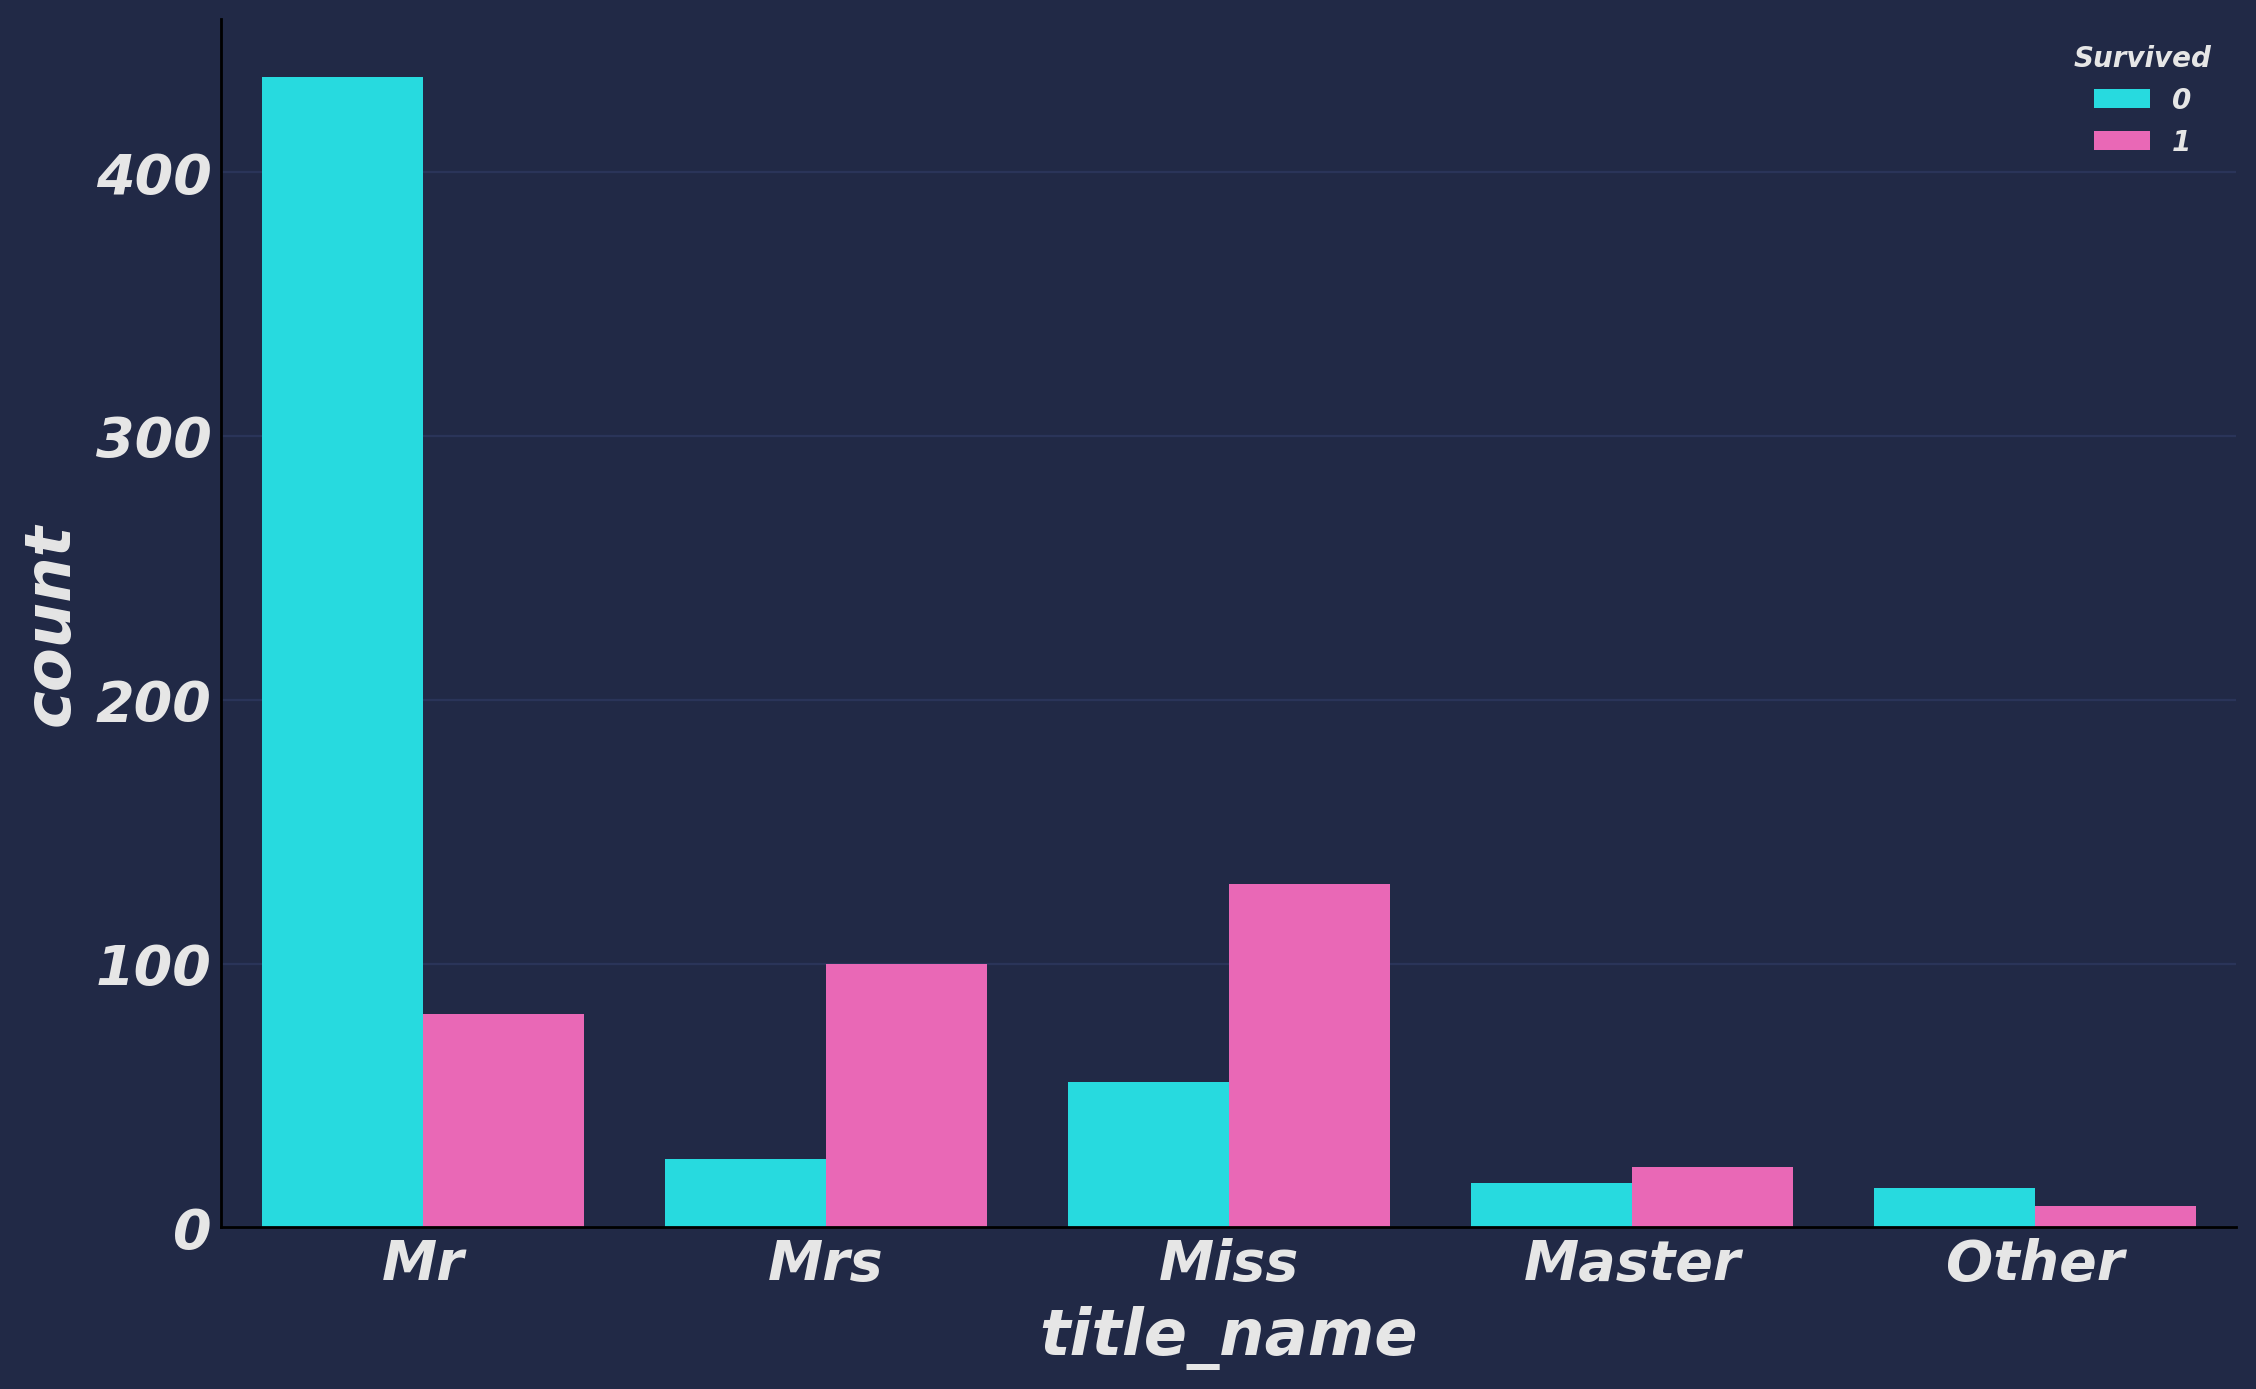

In [15]:
plt.figure(figsize=(13,8))
sns.countplot(train.title_name,hue=train.Survived)

In [ ]:
#gender

male      577
female    314
Name: Sex, dtype: int64

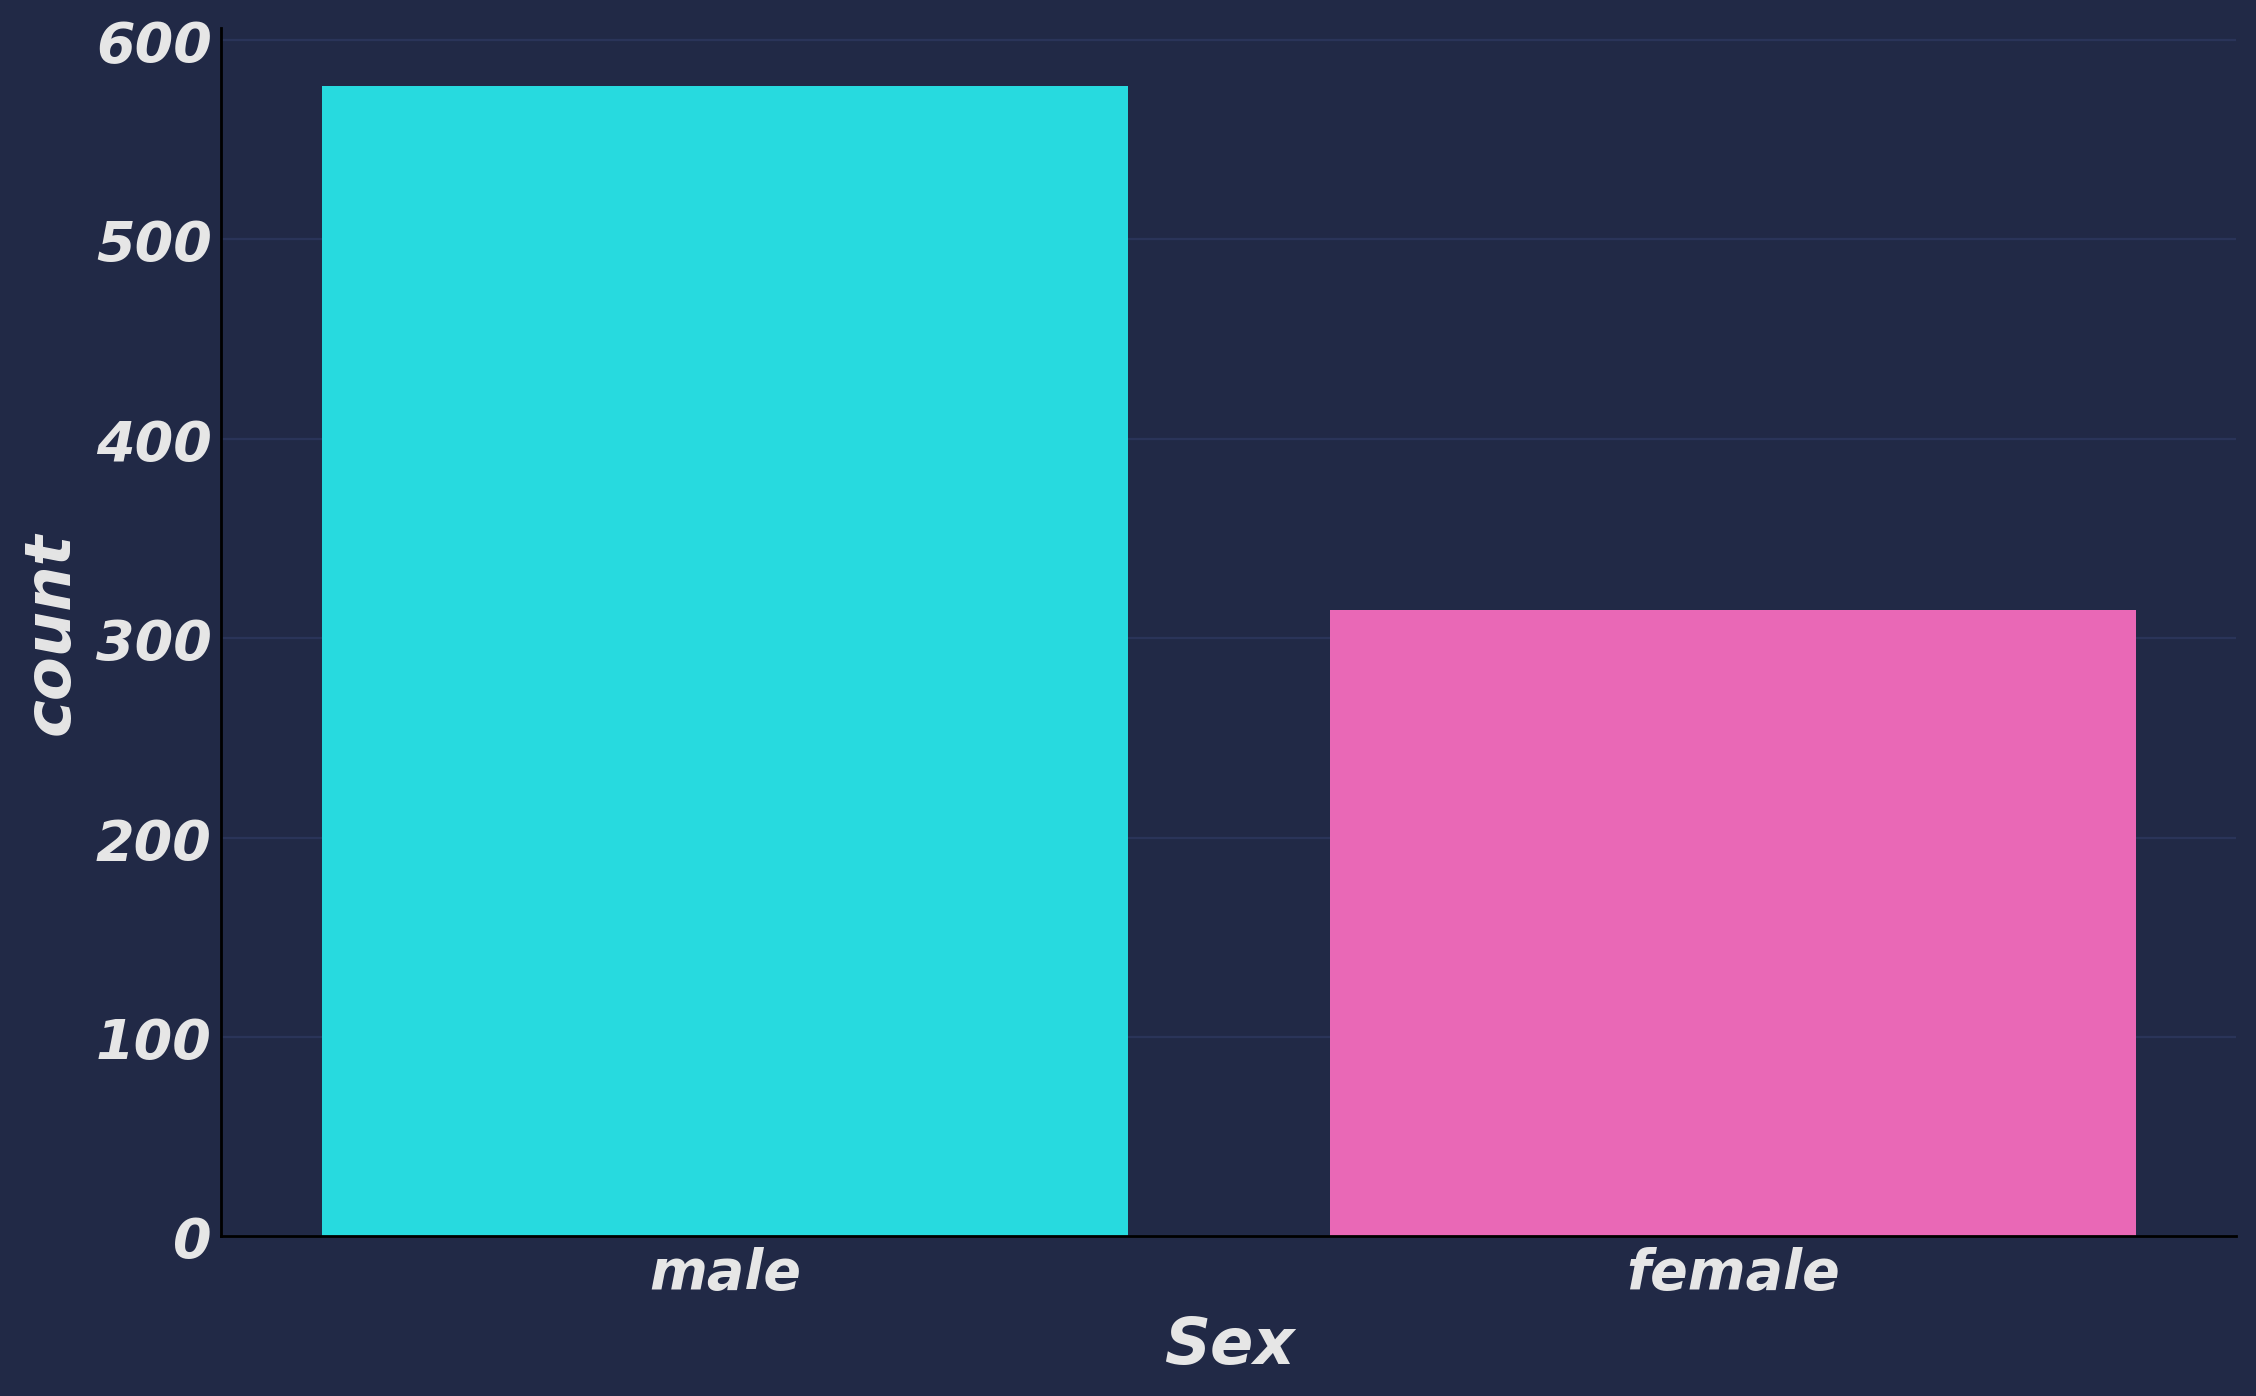

In [55]:
plt.figure(figsize=(13, 8))
sns.countplot(train.Sex) 
cater.Sex.value_counts()

In [118]:
train.groupby("Sex")["Survived"].value_counts(normalize=True).to_frame()

Survived
Sex    Survived          
female 1         0.742038
       0         0.257962
male   0         0.811092
       1         0.188908

In [61]:
train.groupby(["Sex","title_name"])["Survived"].value_counts(normalize=True).to_frame()

Survived
Sex    title_name Survived          
female Miss       1         0.702703
                  0         0.297297
       Mrs        1         0.793651
                  0         0.206349
       Other      1         1.000000
male   Master     1         0.575000
                  0         0.425000
       Mr         0         0.843327
                  1         0.156673
       Other      0         0.750000
                  1         0.250000

In [ ]:
#ticket

In [18]:
tick = train.Ticket.value_counts().to_dict()
ticks = train.Ticket.map(tick)

In [21]:
ticks.astype("object").describe() 

count     891
unique      7
top         1
freq      547
Name: Ticket, dtype: int64

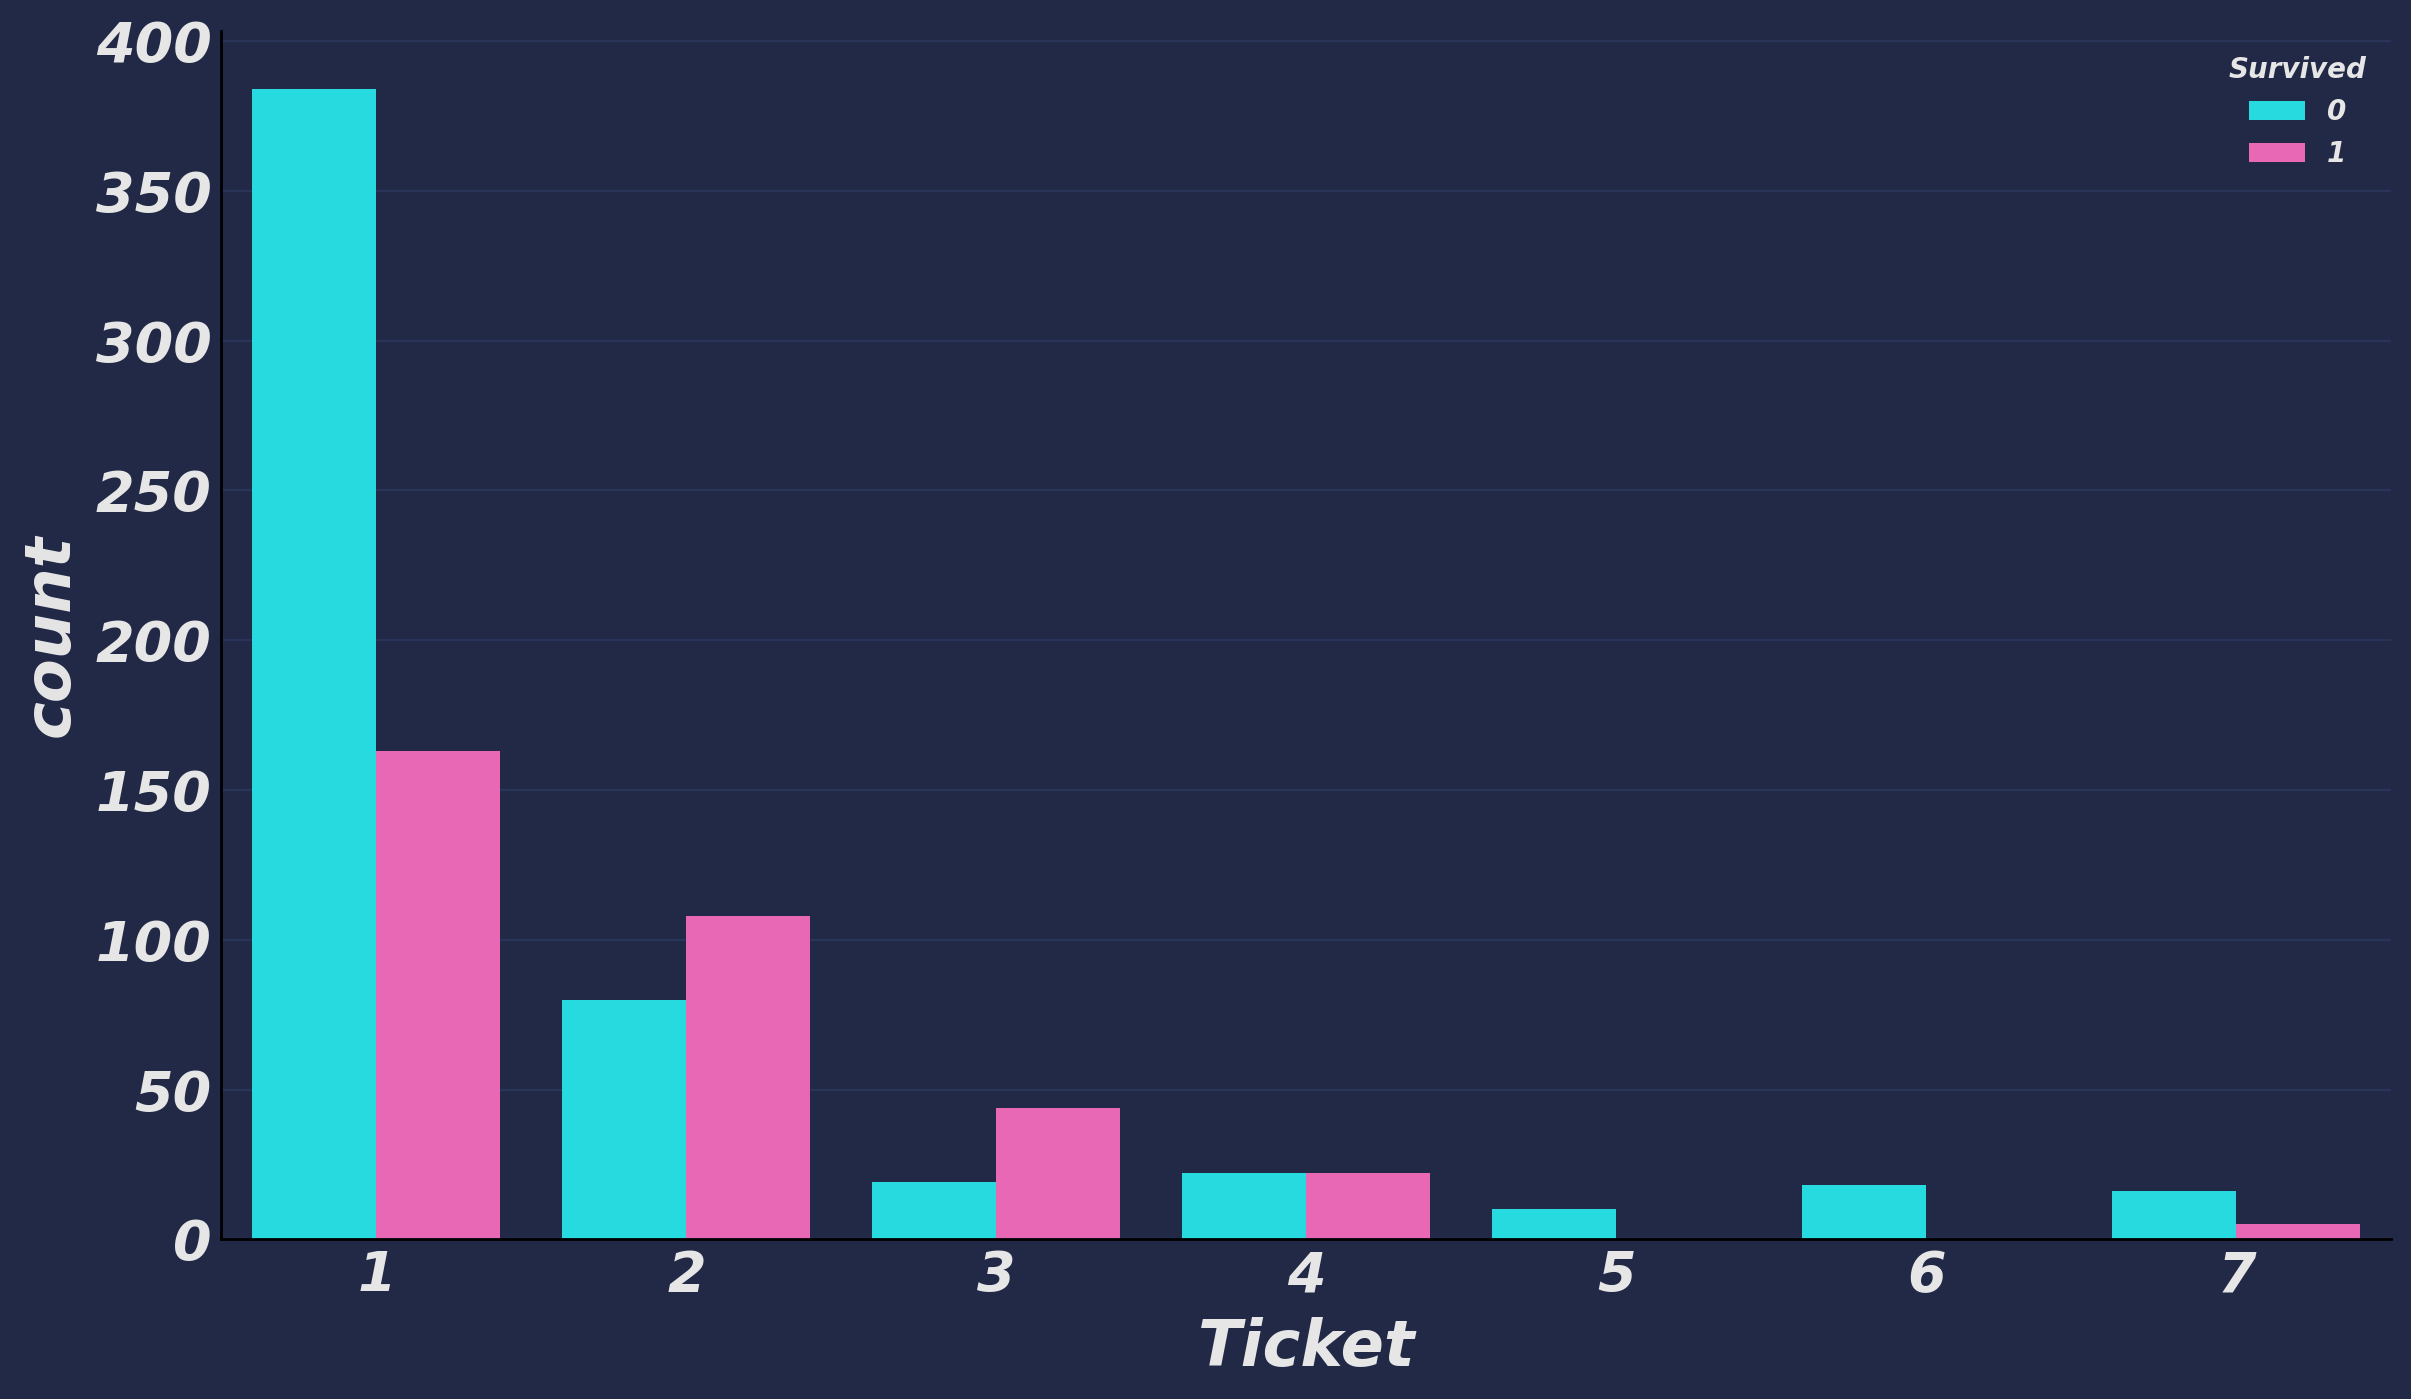

In [22]:
plt.figure(figsize=(14,8))
sns.countplot(ticks, hue = train.Survived) 

In [13]:
for i in [train,test]:
    ticket_co = i.Ticket.value_counts().to_dict() 
    i["ticket_counts"] = i.Ticket.map(ticket_co) 

In [48]:
train.groupby(["Sex","ticket_counts"])["Survived"].value_counts(normalize=True).to_frame()

Survived
Sex    ticket_counts Survived          
female 1             1         0.746269
                     0         0.253731
       2             1         0.813725
                     0         0.186275
       3             1         0.944444
                     0         0.055556
       4             1         0.592593
                     0         0.407407
       5             0         1.000000
       6             0         1.000000
       7             0         1.000000
male   1             0         0.847458
                     1         0.152542
       2             0         0.709302
                     1         0.290698
       3             0         0.629630
                     1         0.370370
       4             0         0.647059
                     1         0.352941
       5             0         1.000000
       6             0         1.000000
       7             0         0.615385
                     1         0.384615

In [ ]:
#cabin 

In [51]:
train.Cabin.value_counts(dropna=False)

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
              ... 
B41              1
D28              1
C54              1
D37              1
B94              1
Name: Cabin, Length: 148, dtype: int64

In [92]:
has_nan = pd.DataFrame({"cabin":np.where(train.Cabin.isnull(),"hilang", "ada")}) 
has_nan.cabin.describe() 

count        891
unique         2
top       hilang
freq         687
Name: cabin, dtype: object

In [79]:
has_nan.cabin.value_counts()

hilang    687
ada       204
Name: cabin, dtype: int64

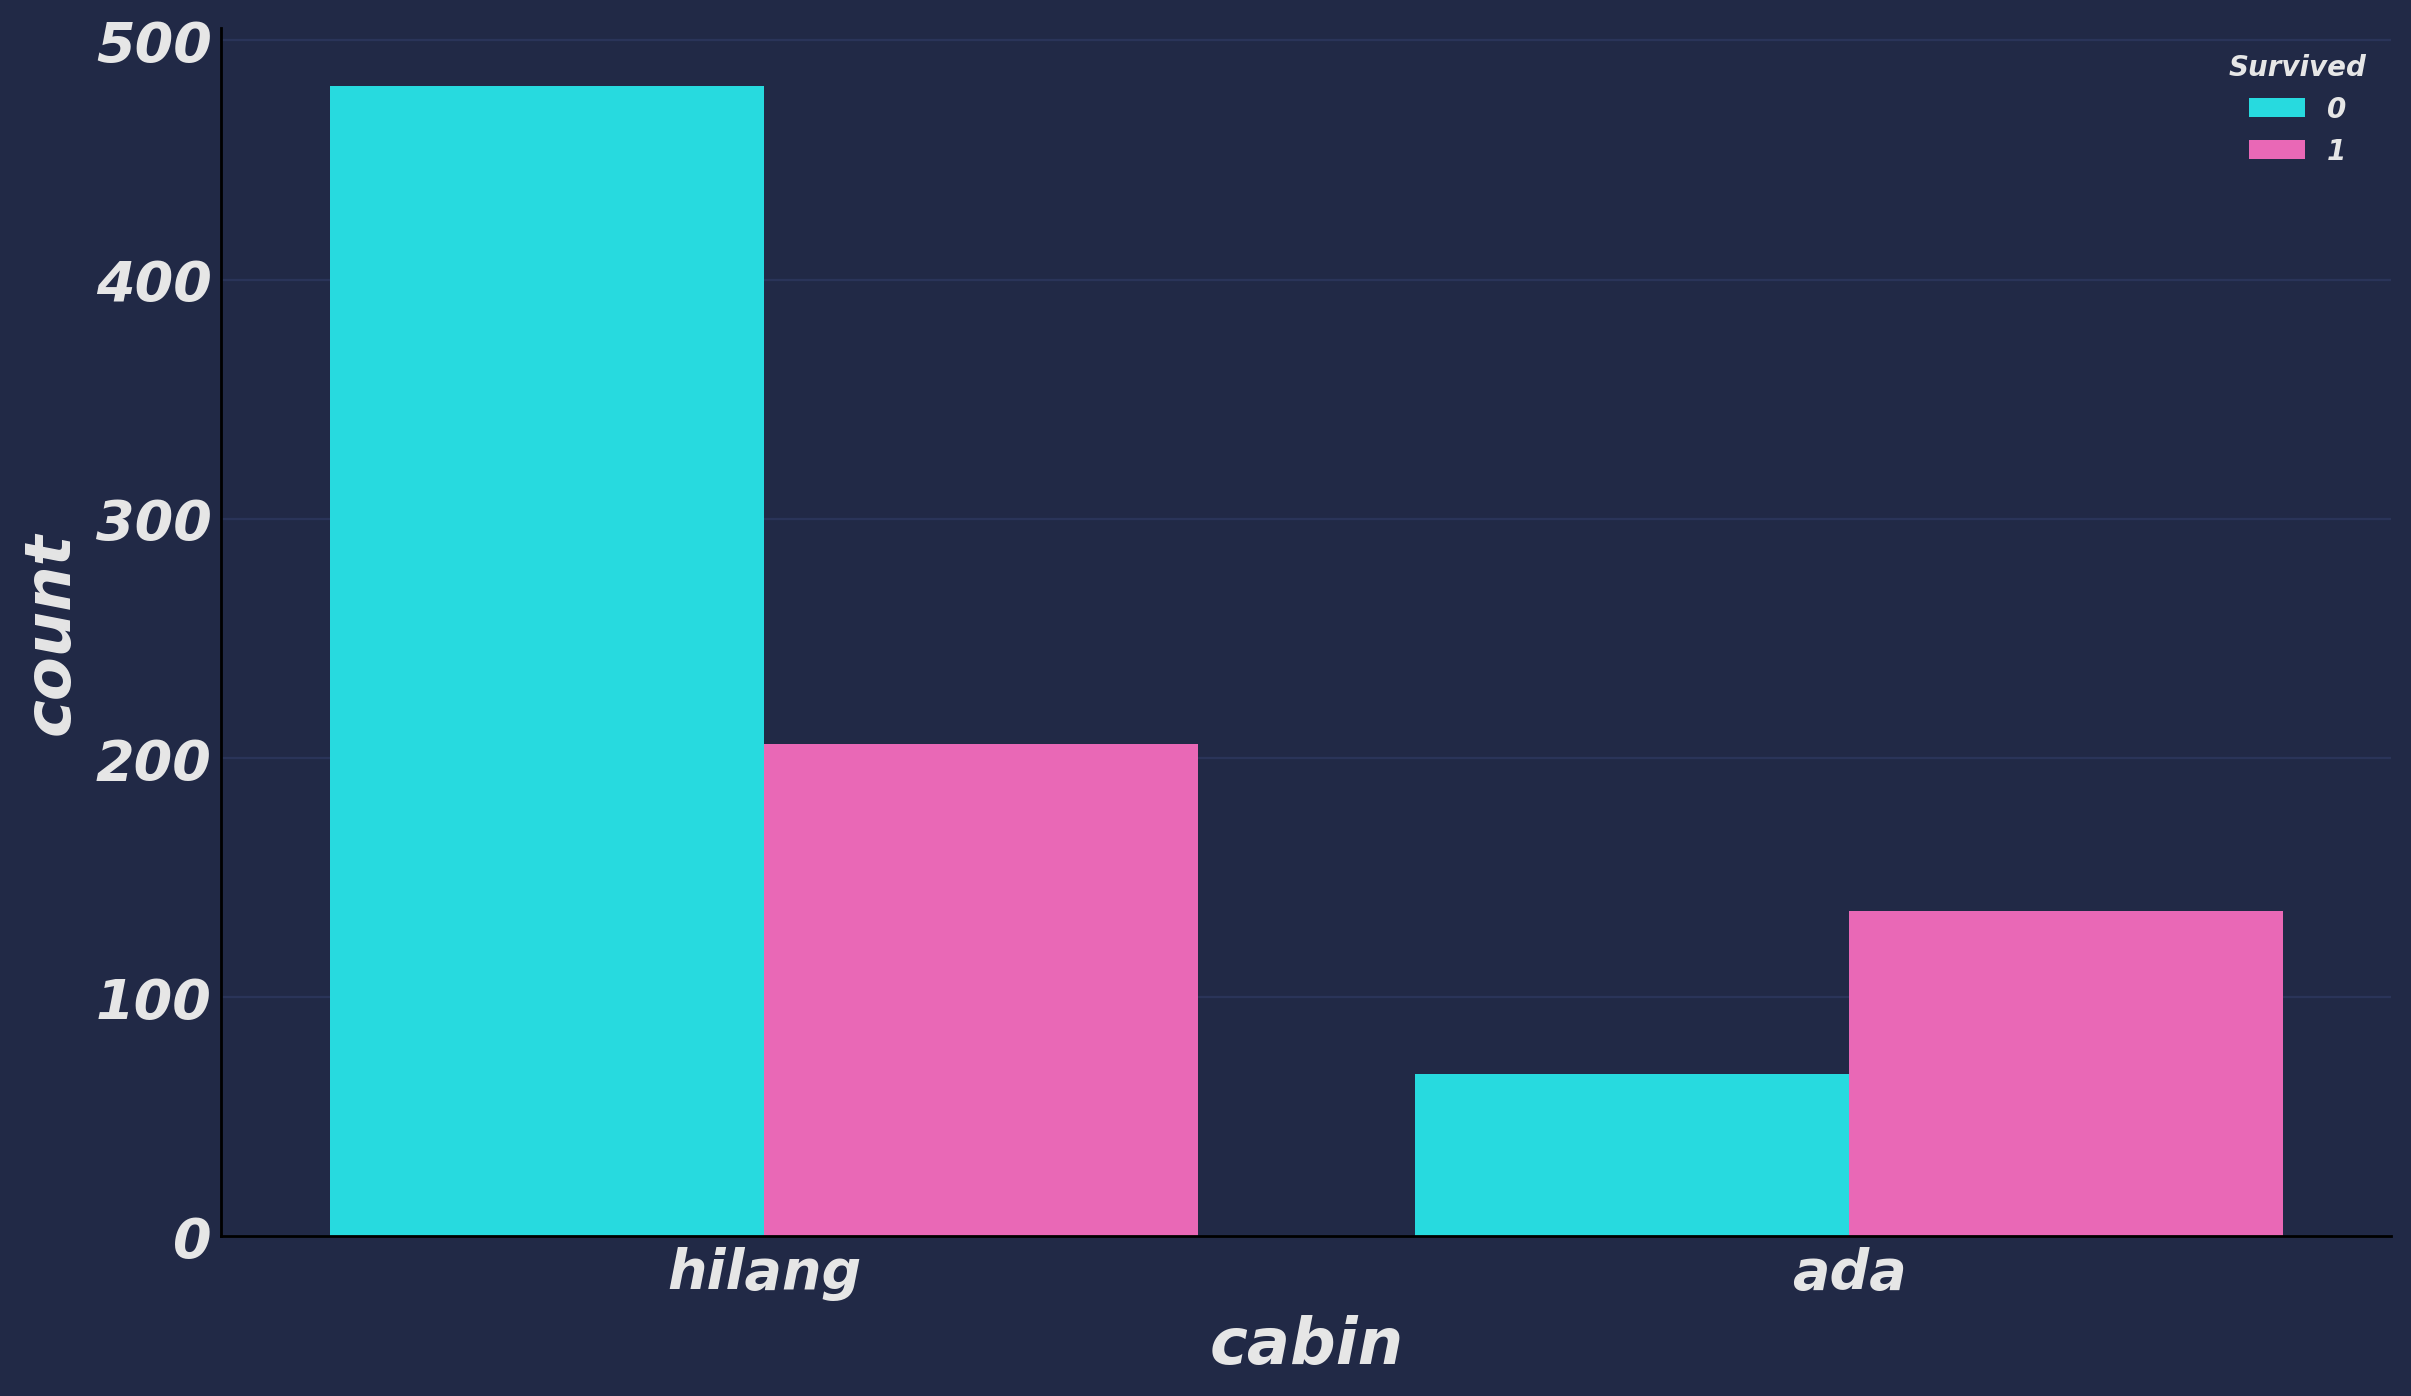

In [80]:
plt.figure(figsize=(14,8))
sns.countplot(has_nan.cabin,hue=train.Survived)

In [82]:
pd.crosstab(has_nan.cabin,train.Survived,normalize=True)

Survived,0,1
cabin,,
ada,0.076319,0.152637
hilang,0.539843,0.231201


In [14]:
for i in [train,test]:
    i["has_cabin"] = np.where(i.Cabin.isnull(), "No", "Yes") 

In [87]:
train.groupby(["Sex","has_cabin"])["Survived"].value_counts(normalize=True).to_frame()

Survived
Sex    has_cabin Survived          
female No        1         0.654378
                 0         0.345622
       Yes       1         0.938144
                 0         0.061856
male   No        0         0.863830
                 1         0.136170
       Yes       0         0.579439
                 1         0.420561

In [96]:
#embarked

In [110]:
train.Embarked.value_counts(dropna=False) 

S    646
C    168
Q     77
Name: Embarked, dtype: int64

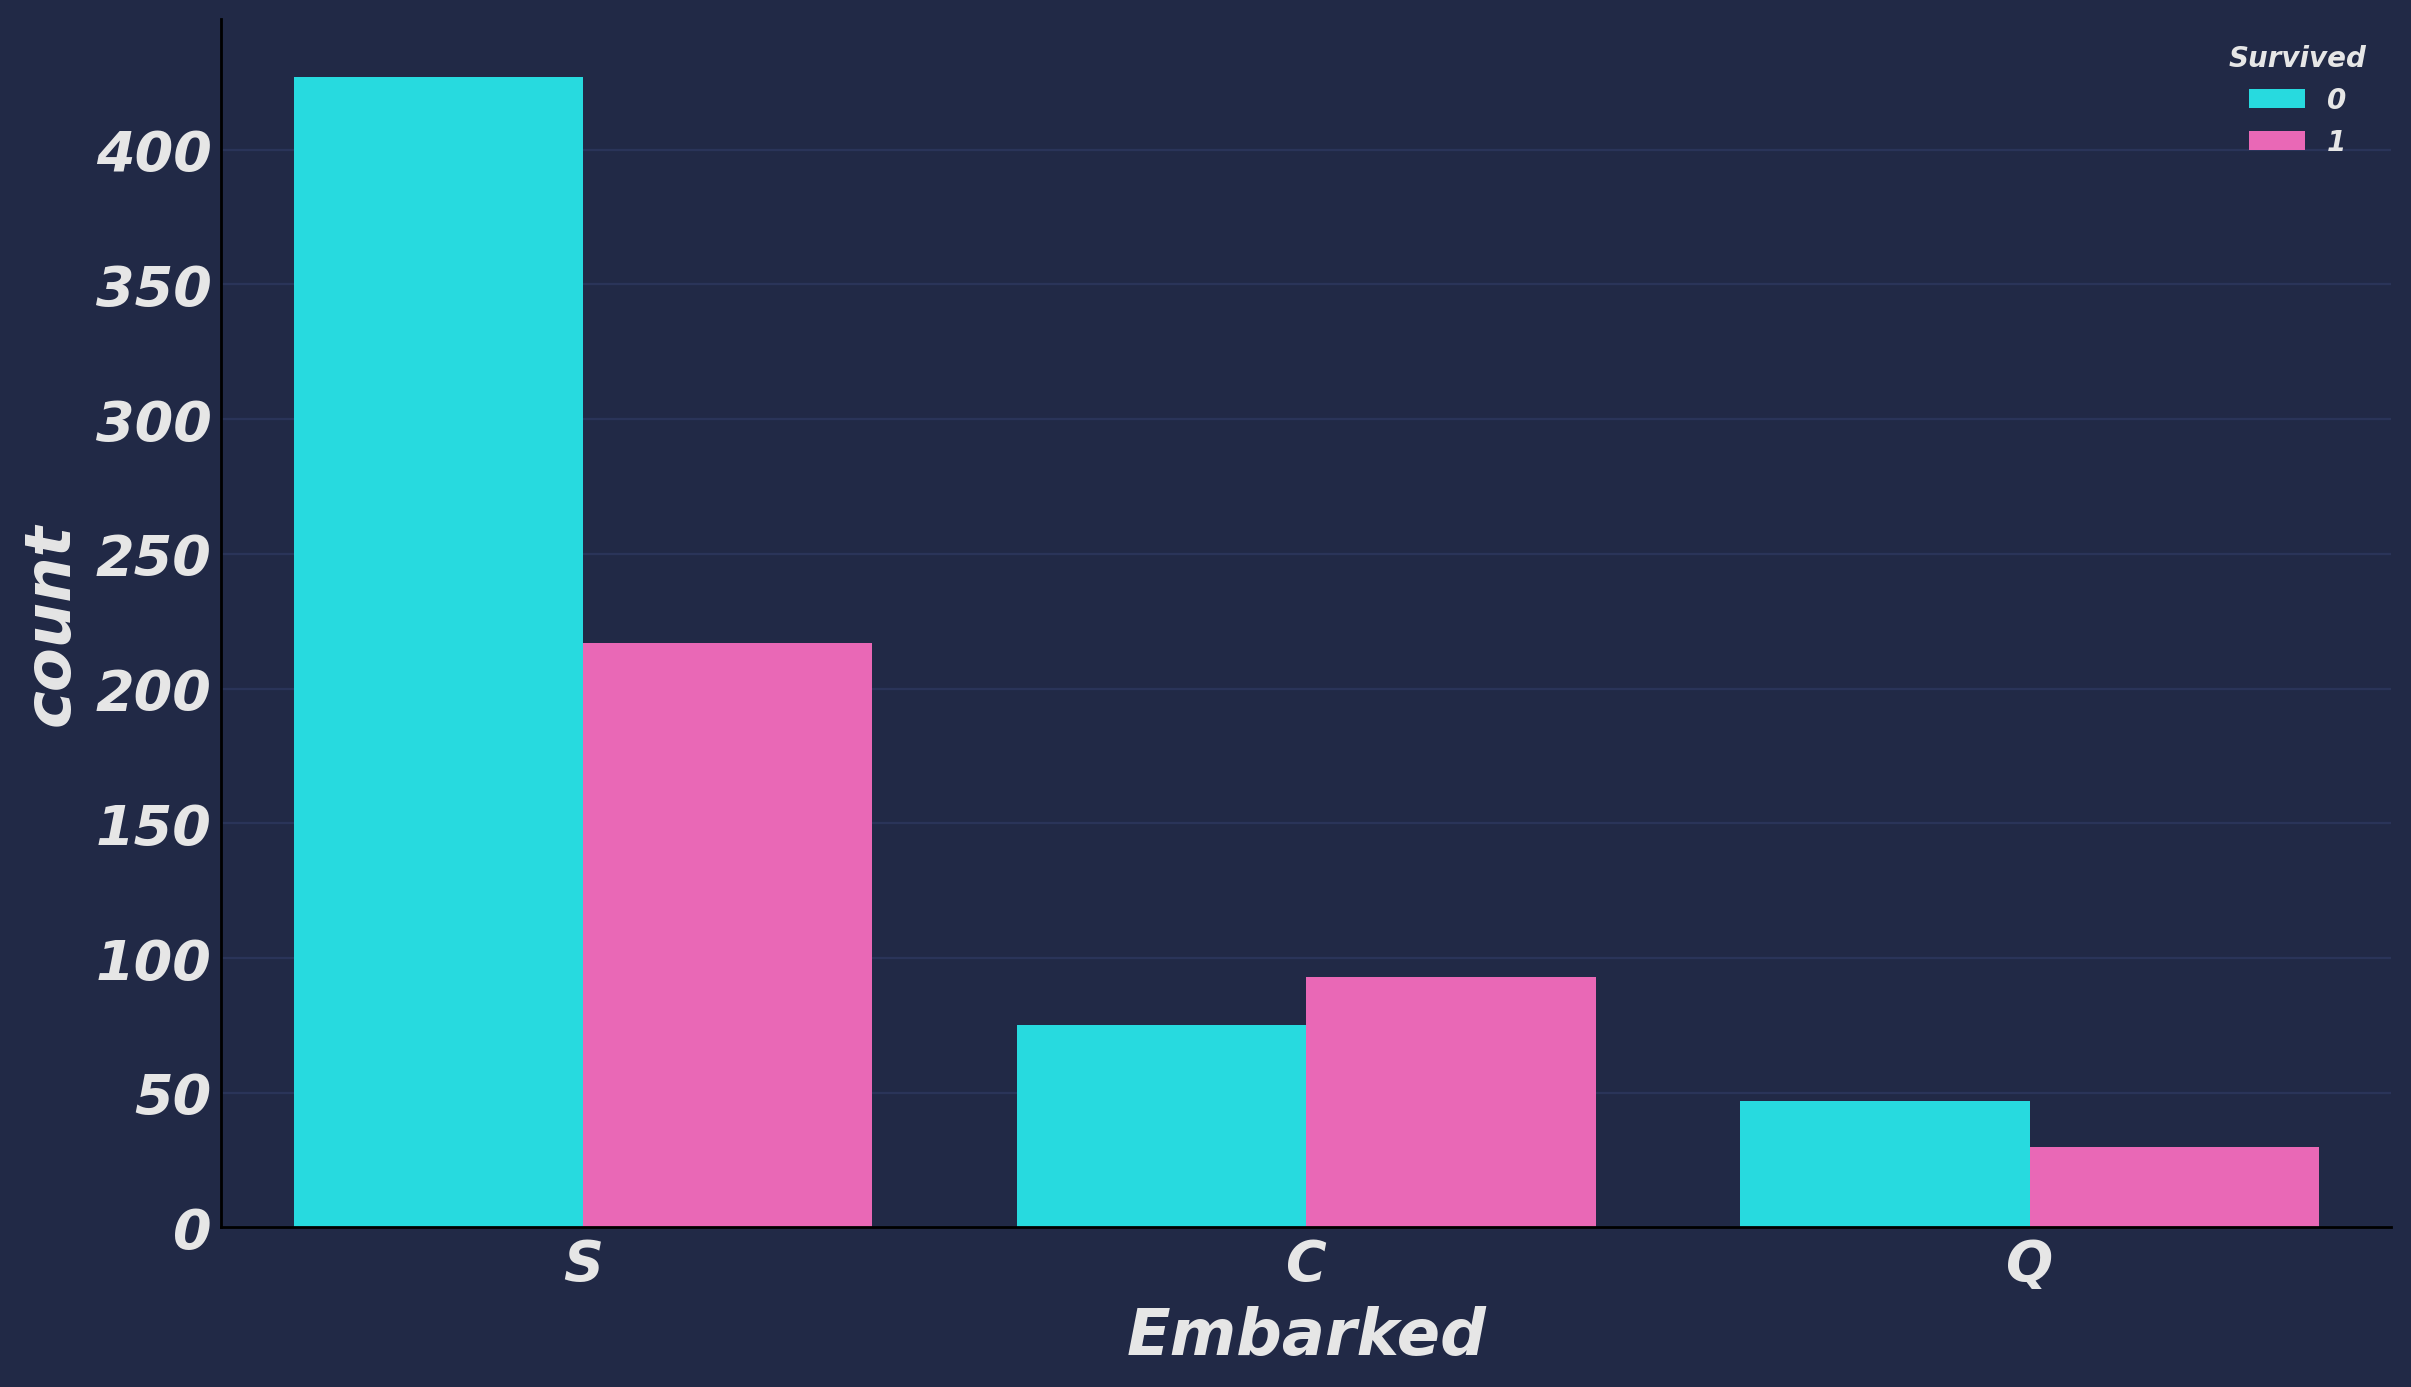

In [98]:
plt.figure(figsize=(14,8))
sns.countplot(train.Embarked,hue=train.Survived)

In [99]:
train.groupby(["Sex","Embarked"])["Survived"].value_counts(normalize=True).to_frame()

Survived
Sex    Embarked Survived          
female C        1         0.876712
                0         0.123288
       Q        1         0.750000
                0         0.250000
       S        1         0.689655
                0         0.310345
male   C        0         0.694737
                1         0.305263
       Q        0         0.926829
                1         0.073171
       S        0         0.825397
                1         0.174603

In [15]:
for i in [train,test]:
    i.Embarked.fillna("S", inplace=True) 

In [ ]:
#numerical features

In [103]:
number.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#pclass

In [111]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

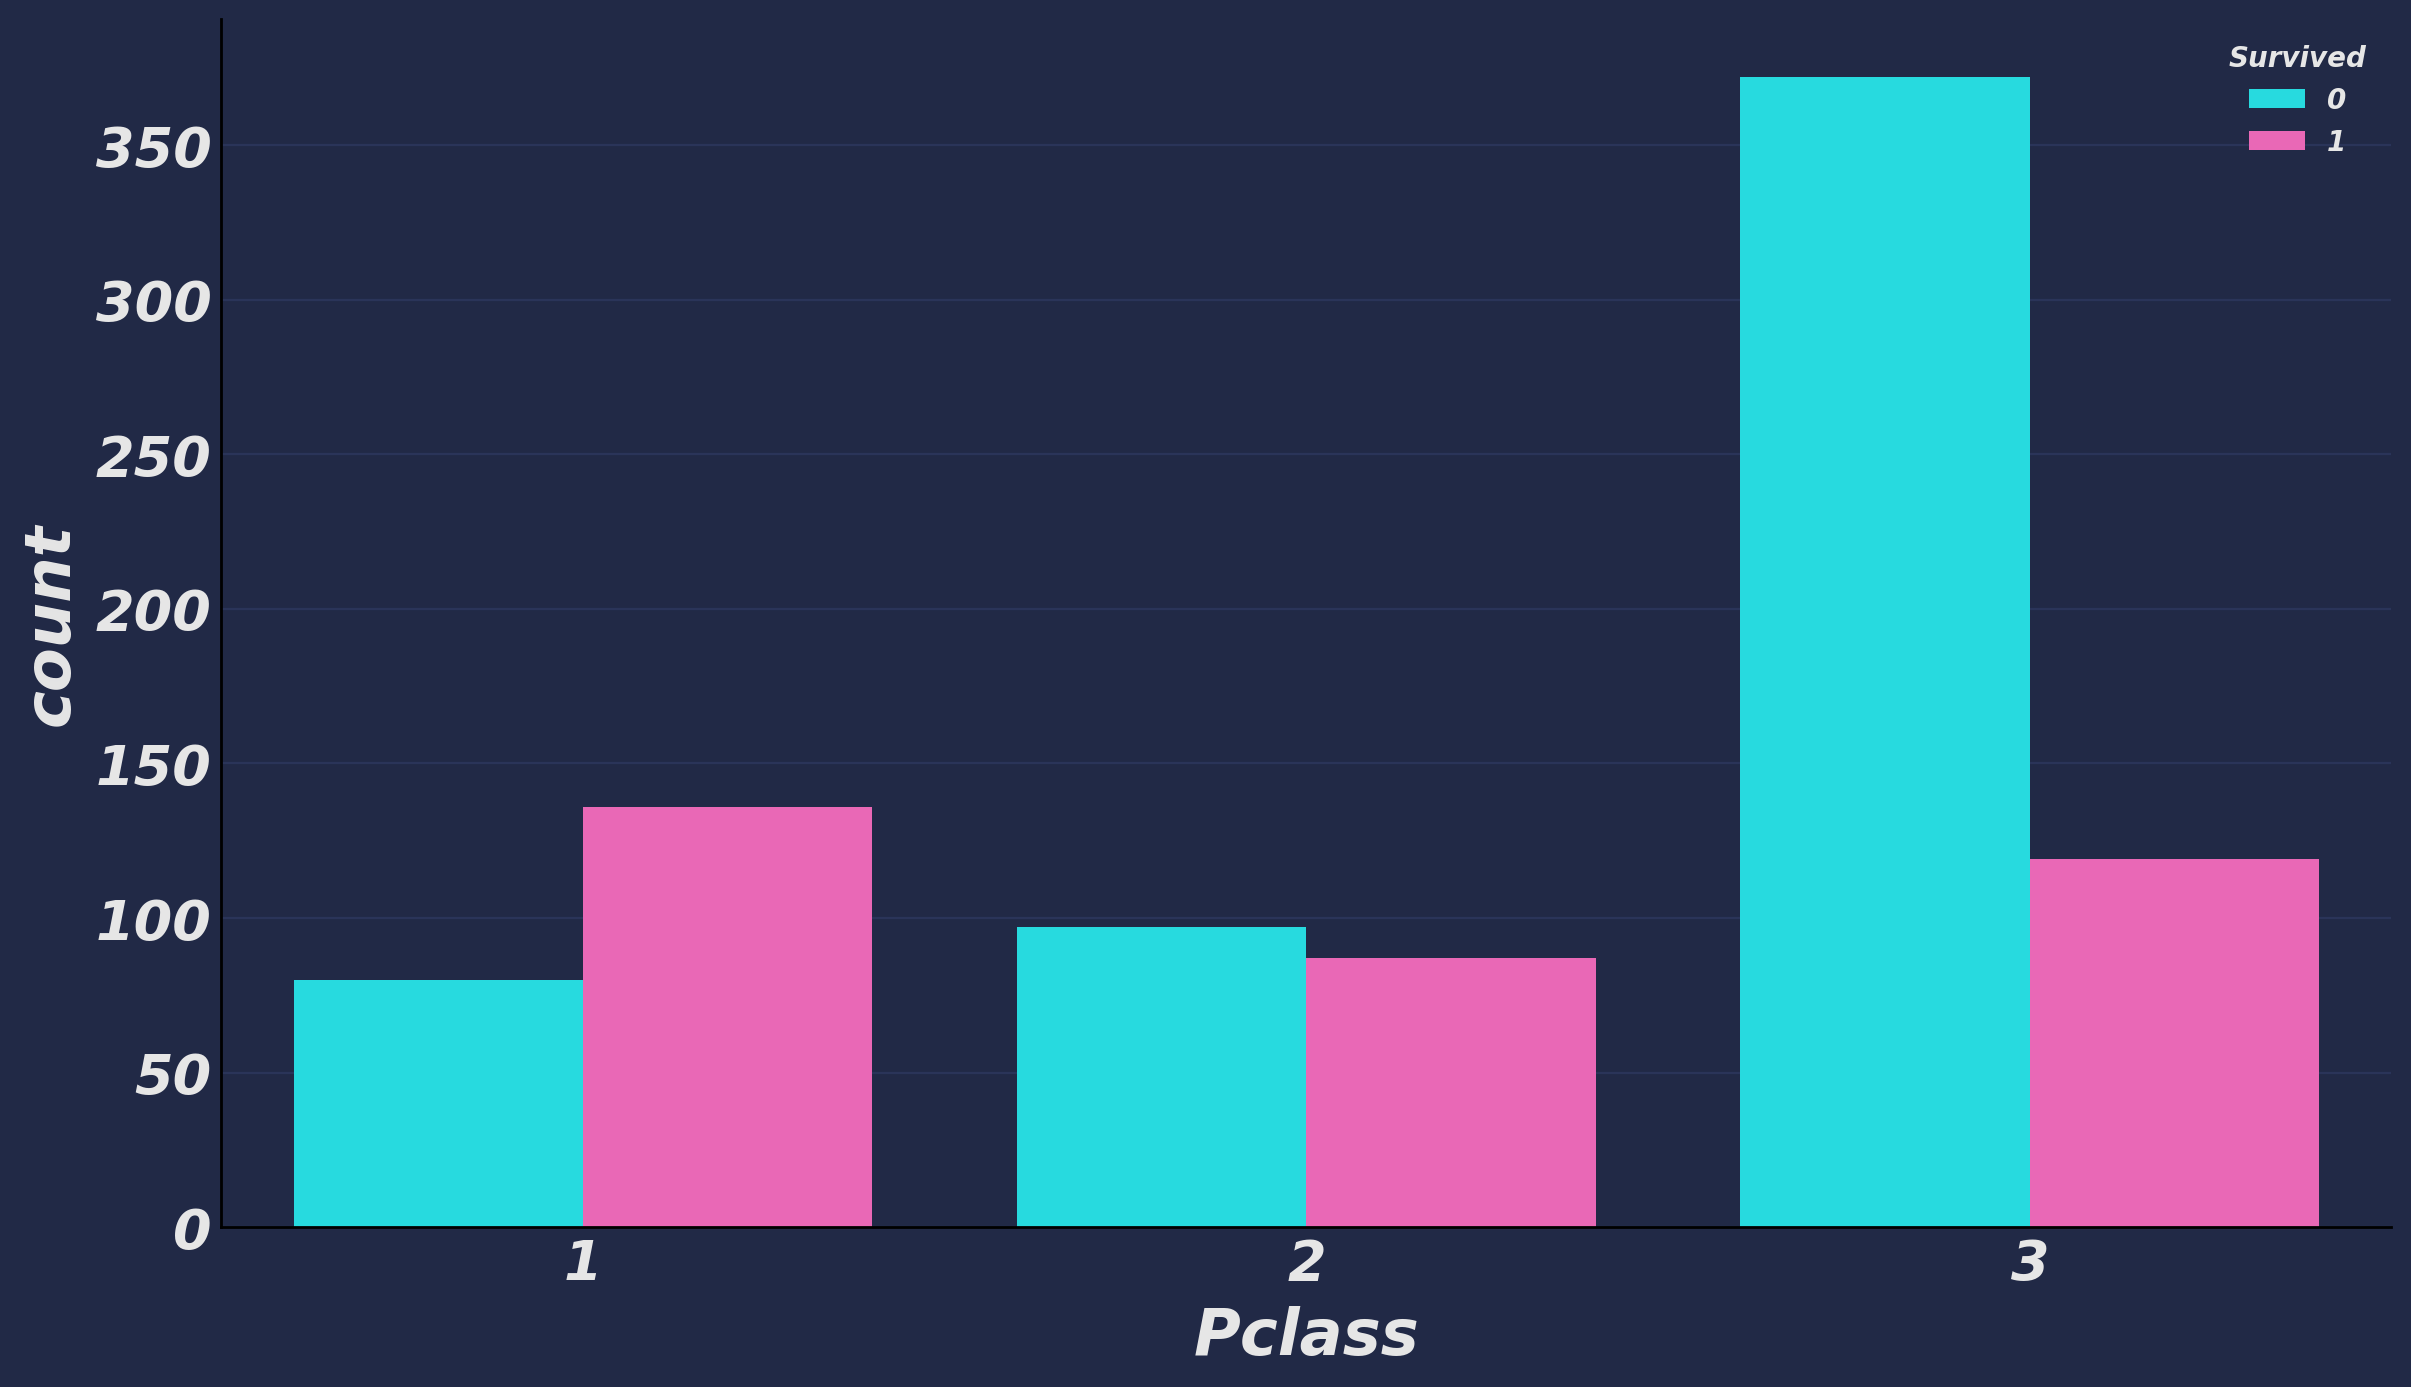

In [112]:
plt.figure(figsize=(14,8))
sns.countplot(train.Pclass,hue=train.Survived)

In [113]:
train.groupby(["Sex","Pclass"])["Survived"].value_counts(normalize=True).to_frame()

Survived
Sex    Pclass Survived          
female 1      1         0.968085
              0         0.031915
       2      1         0.921053
              0         0.078947
       3      0         0.500000
              1         0.500000
male   1      0         0.631148
              1         0.368852
       2      0         0.842593
              1         0.157407
       3      0         0.864553
              1         0.135447

In [114]:
train.groupby(["Sex","Pclass","has_cabin"])["Survived"].value_counts(normalize=True).to_frame()

Survived
Sex    Pclass has_cabin Survived          
female 1      No        1         1.000000
              Yes       1         0.962963
                        0         0.037037
       2      No        1         0.924242
                        0         0.075758
              Yes       1         0.900000
                        0         0.100000
       3      No        0         0.507246
                        1         0.492754
              Yes       1         0.666667
                        0         0.333333
male   1      No        0         0.777778
                        1         0.222222
              Yes       0         0.589474
                        1         0.410526
       2      No        0         0.872549
                        1         0.127451
              Yes       1         0.666667
                        0         0.333333
       3      No        0         0.868035
                        1         0.131965
              Yes       0         0.666667
                        1         0.333333

In [ ]:
#age

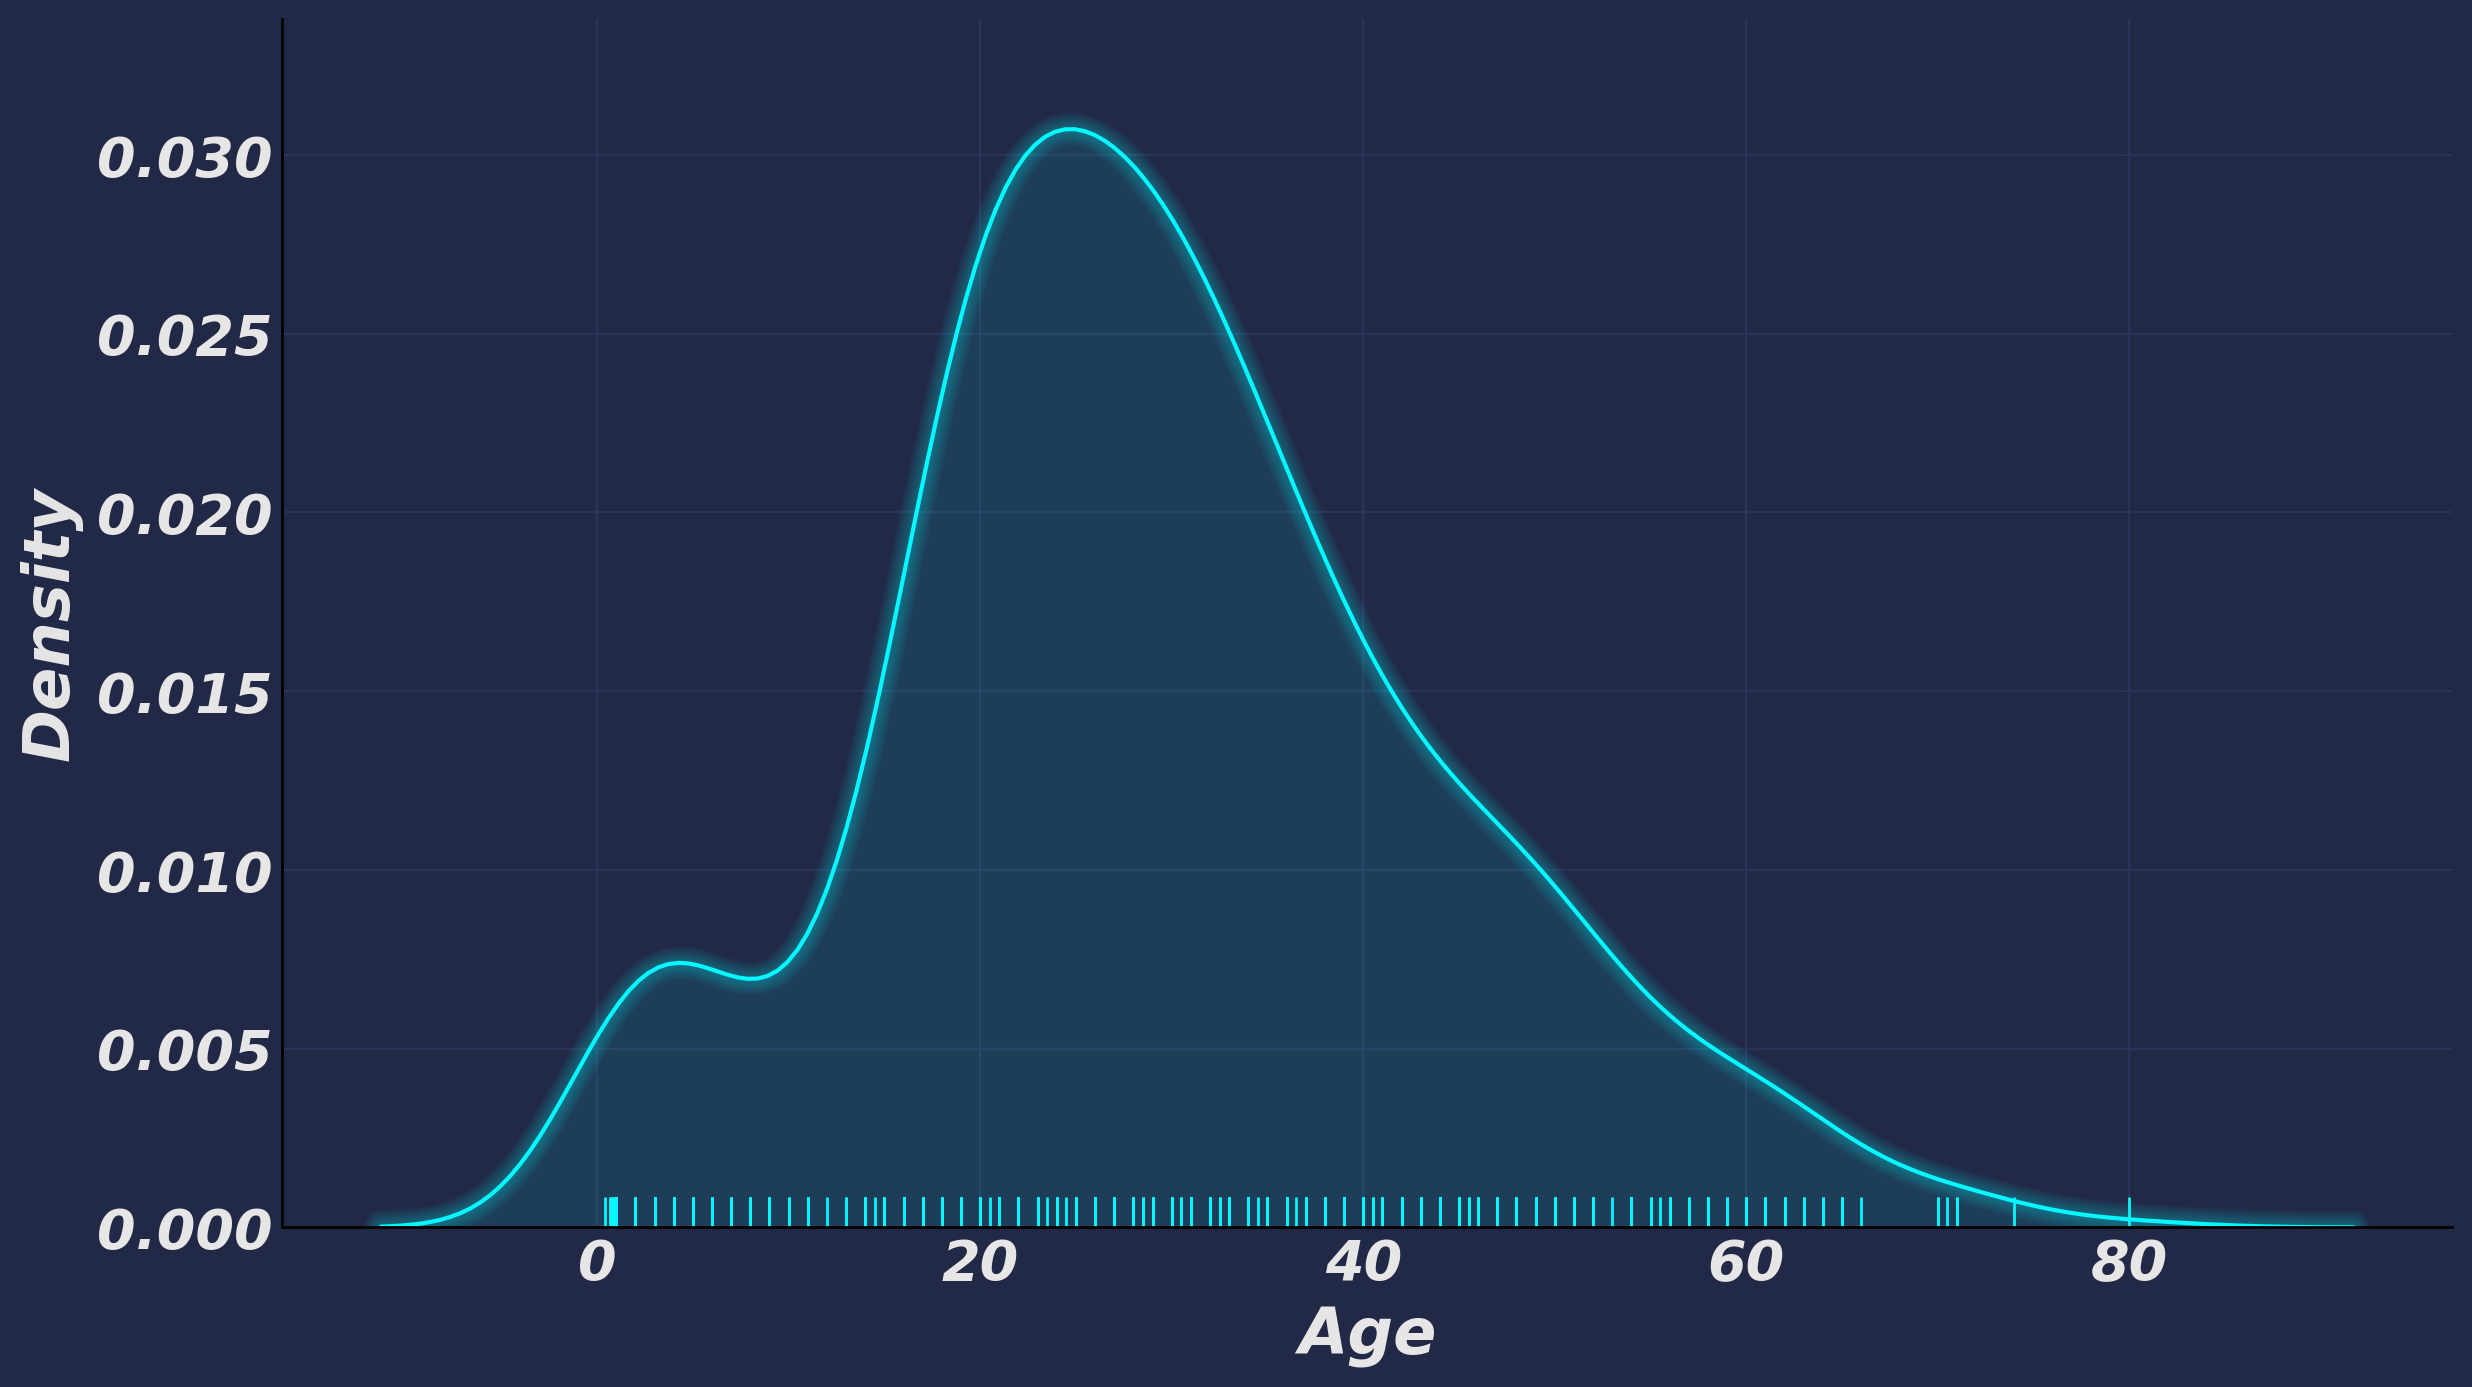

In [15]:
plt.figure(figsize=(14, 8))

sns.distplot(train.Age,hist=False,rug=True) 

mplcyberpunk.add_glow_effects() 

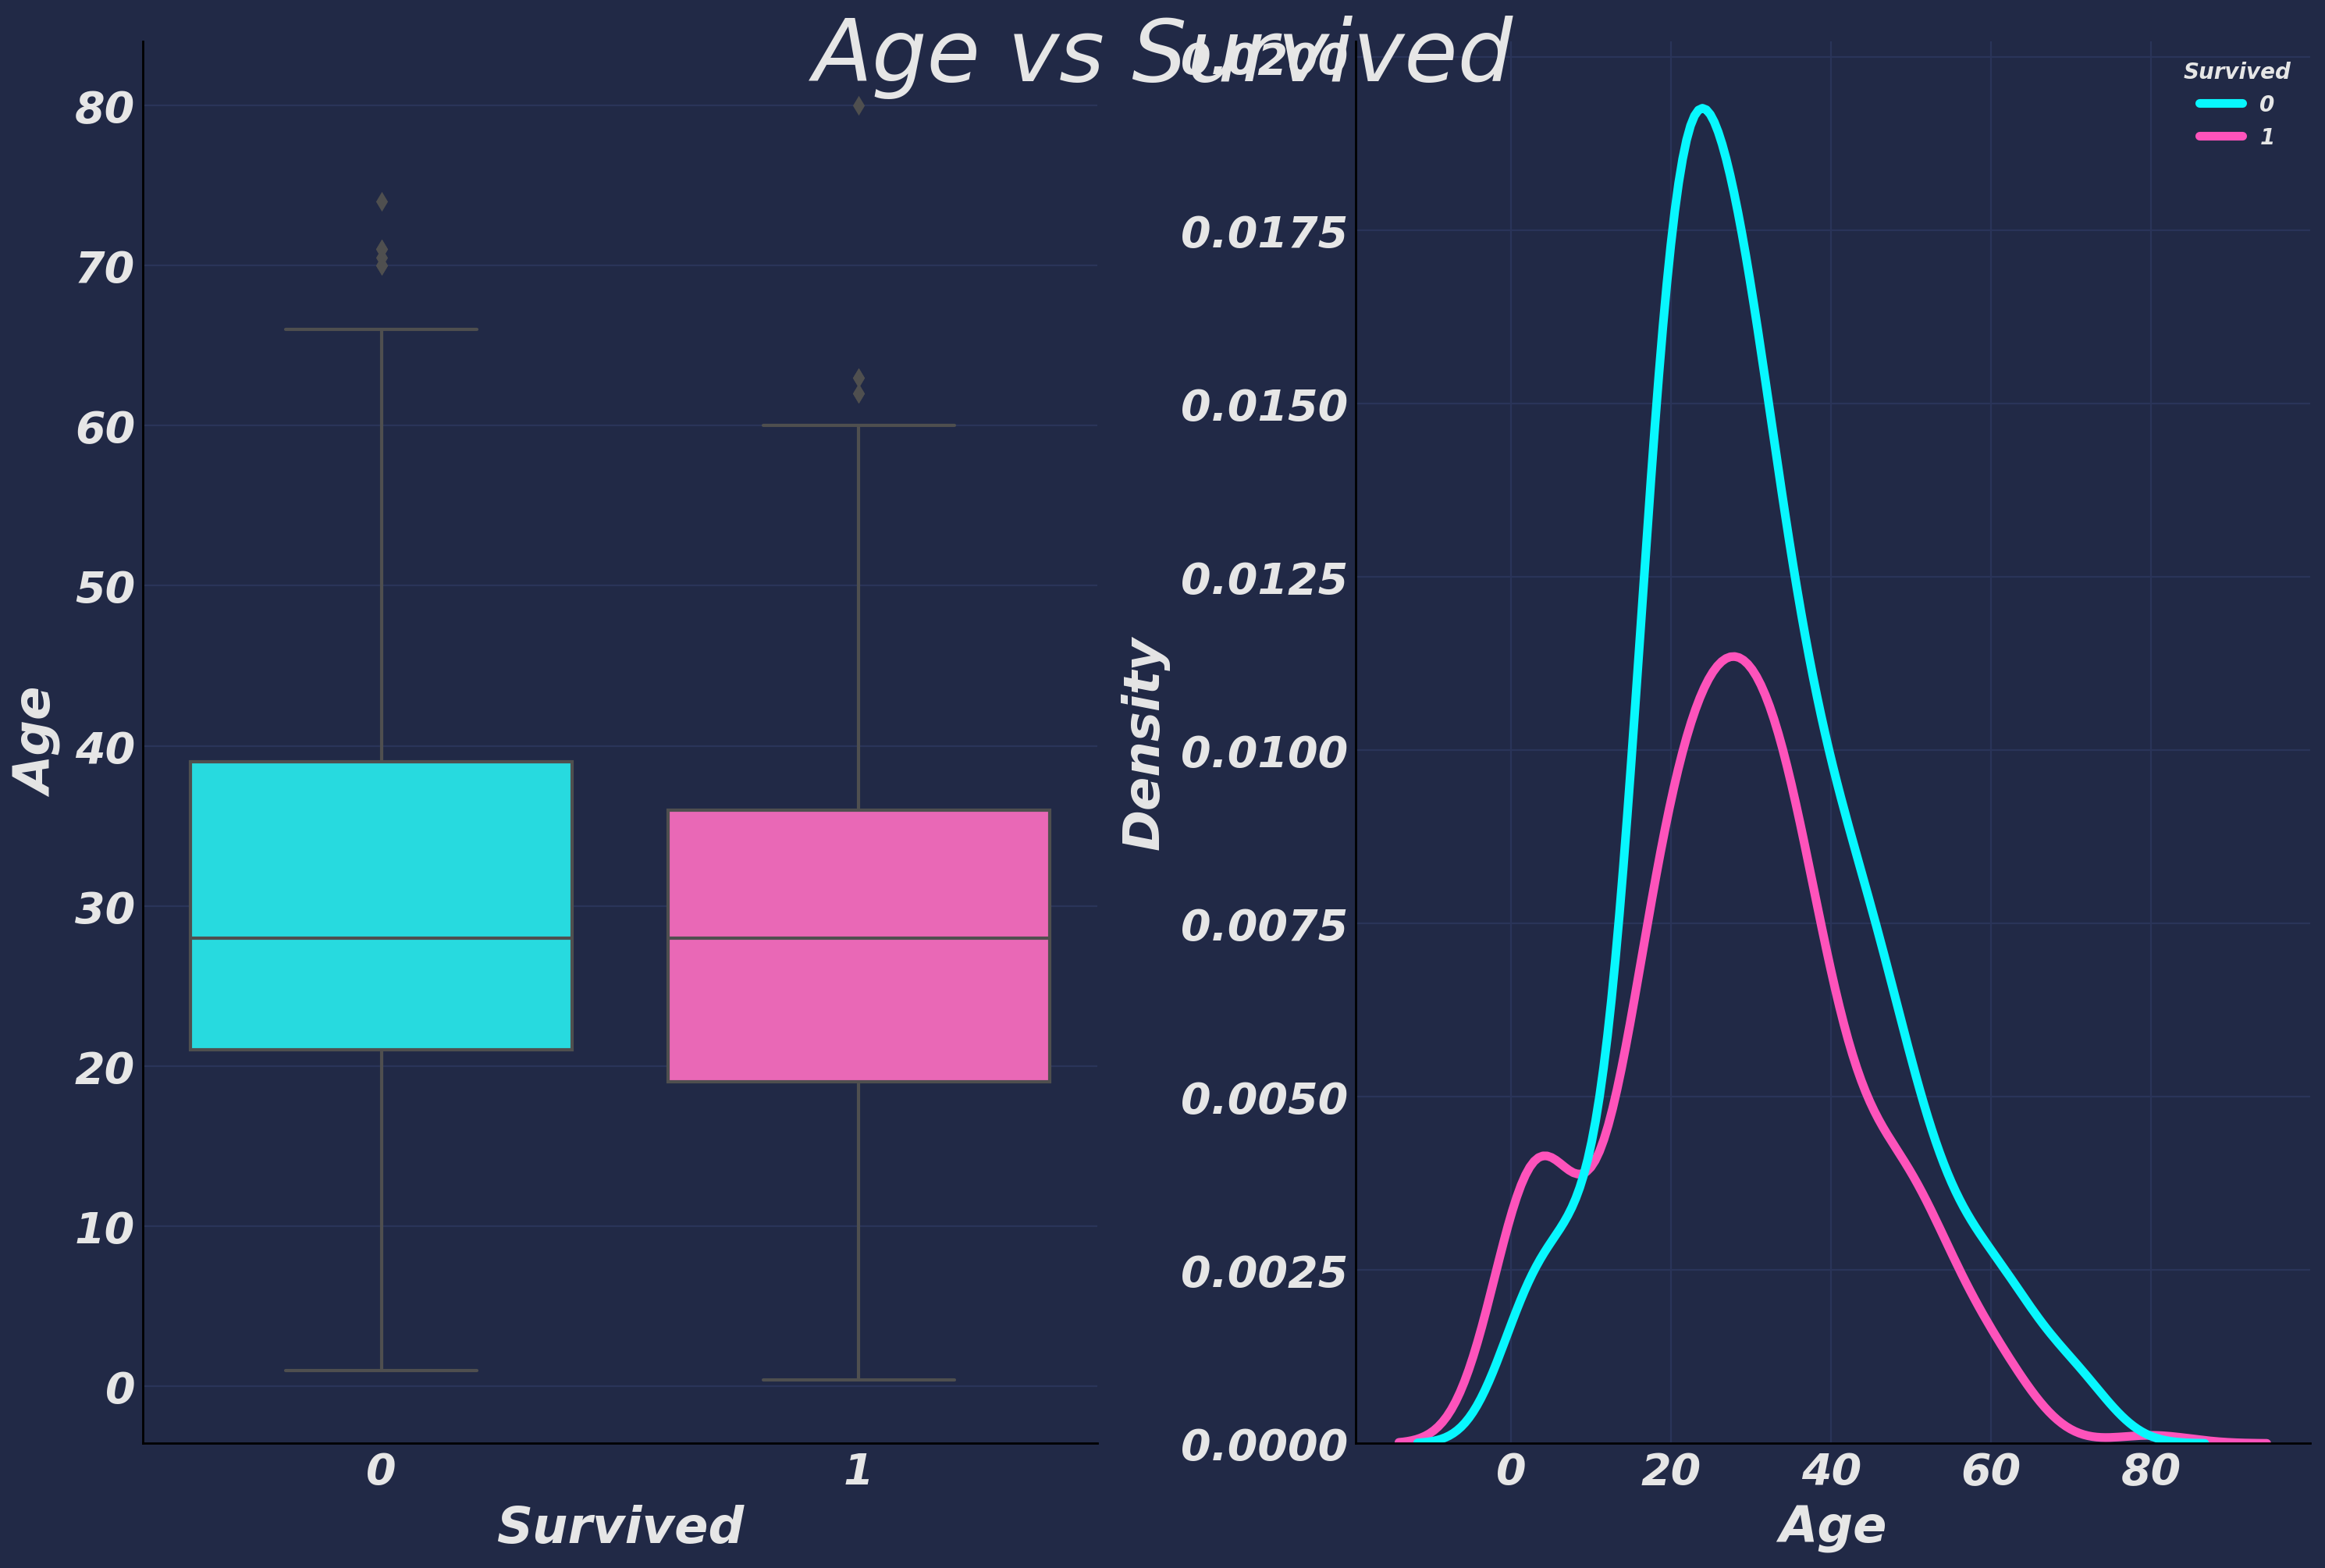

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(x=train.Survived, y=train.Age)

plt.subplot(122)
sns.kdeplot(train.Age,hue=train.Survived,linewidth=4)

plt.suptitle("Age vs Survived",size=40,y=1)
plt.tight_layout() 
plt.show() 

In [29]:
train.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [16]:
#fill age 
for i in [train,test]:
    i["Age"] = train.groupby("Sex")["Age"].apply(lambda x: x.fillna(x.median())) 

In [17]:
bin = [0,20,40,60,80]
label = ["0-20", "20-40", "40-60", " 60-80"]

age_bin = pd.cut(train.Age,bins=bin,labels = label)
age_bin.describe() 

count       891
unique        4
top       20-40
freq        562
Name: Age, dtype: object

In [35]:
pd.crosstab(age_bin,train.Survived,normalize=True) 

Survived,0,1
Age,,
0-20,0.108866,0.092031
20-40,0.400673,0.230079
40-60,0.087542,0.056117
60-80,0.019080,0.005612


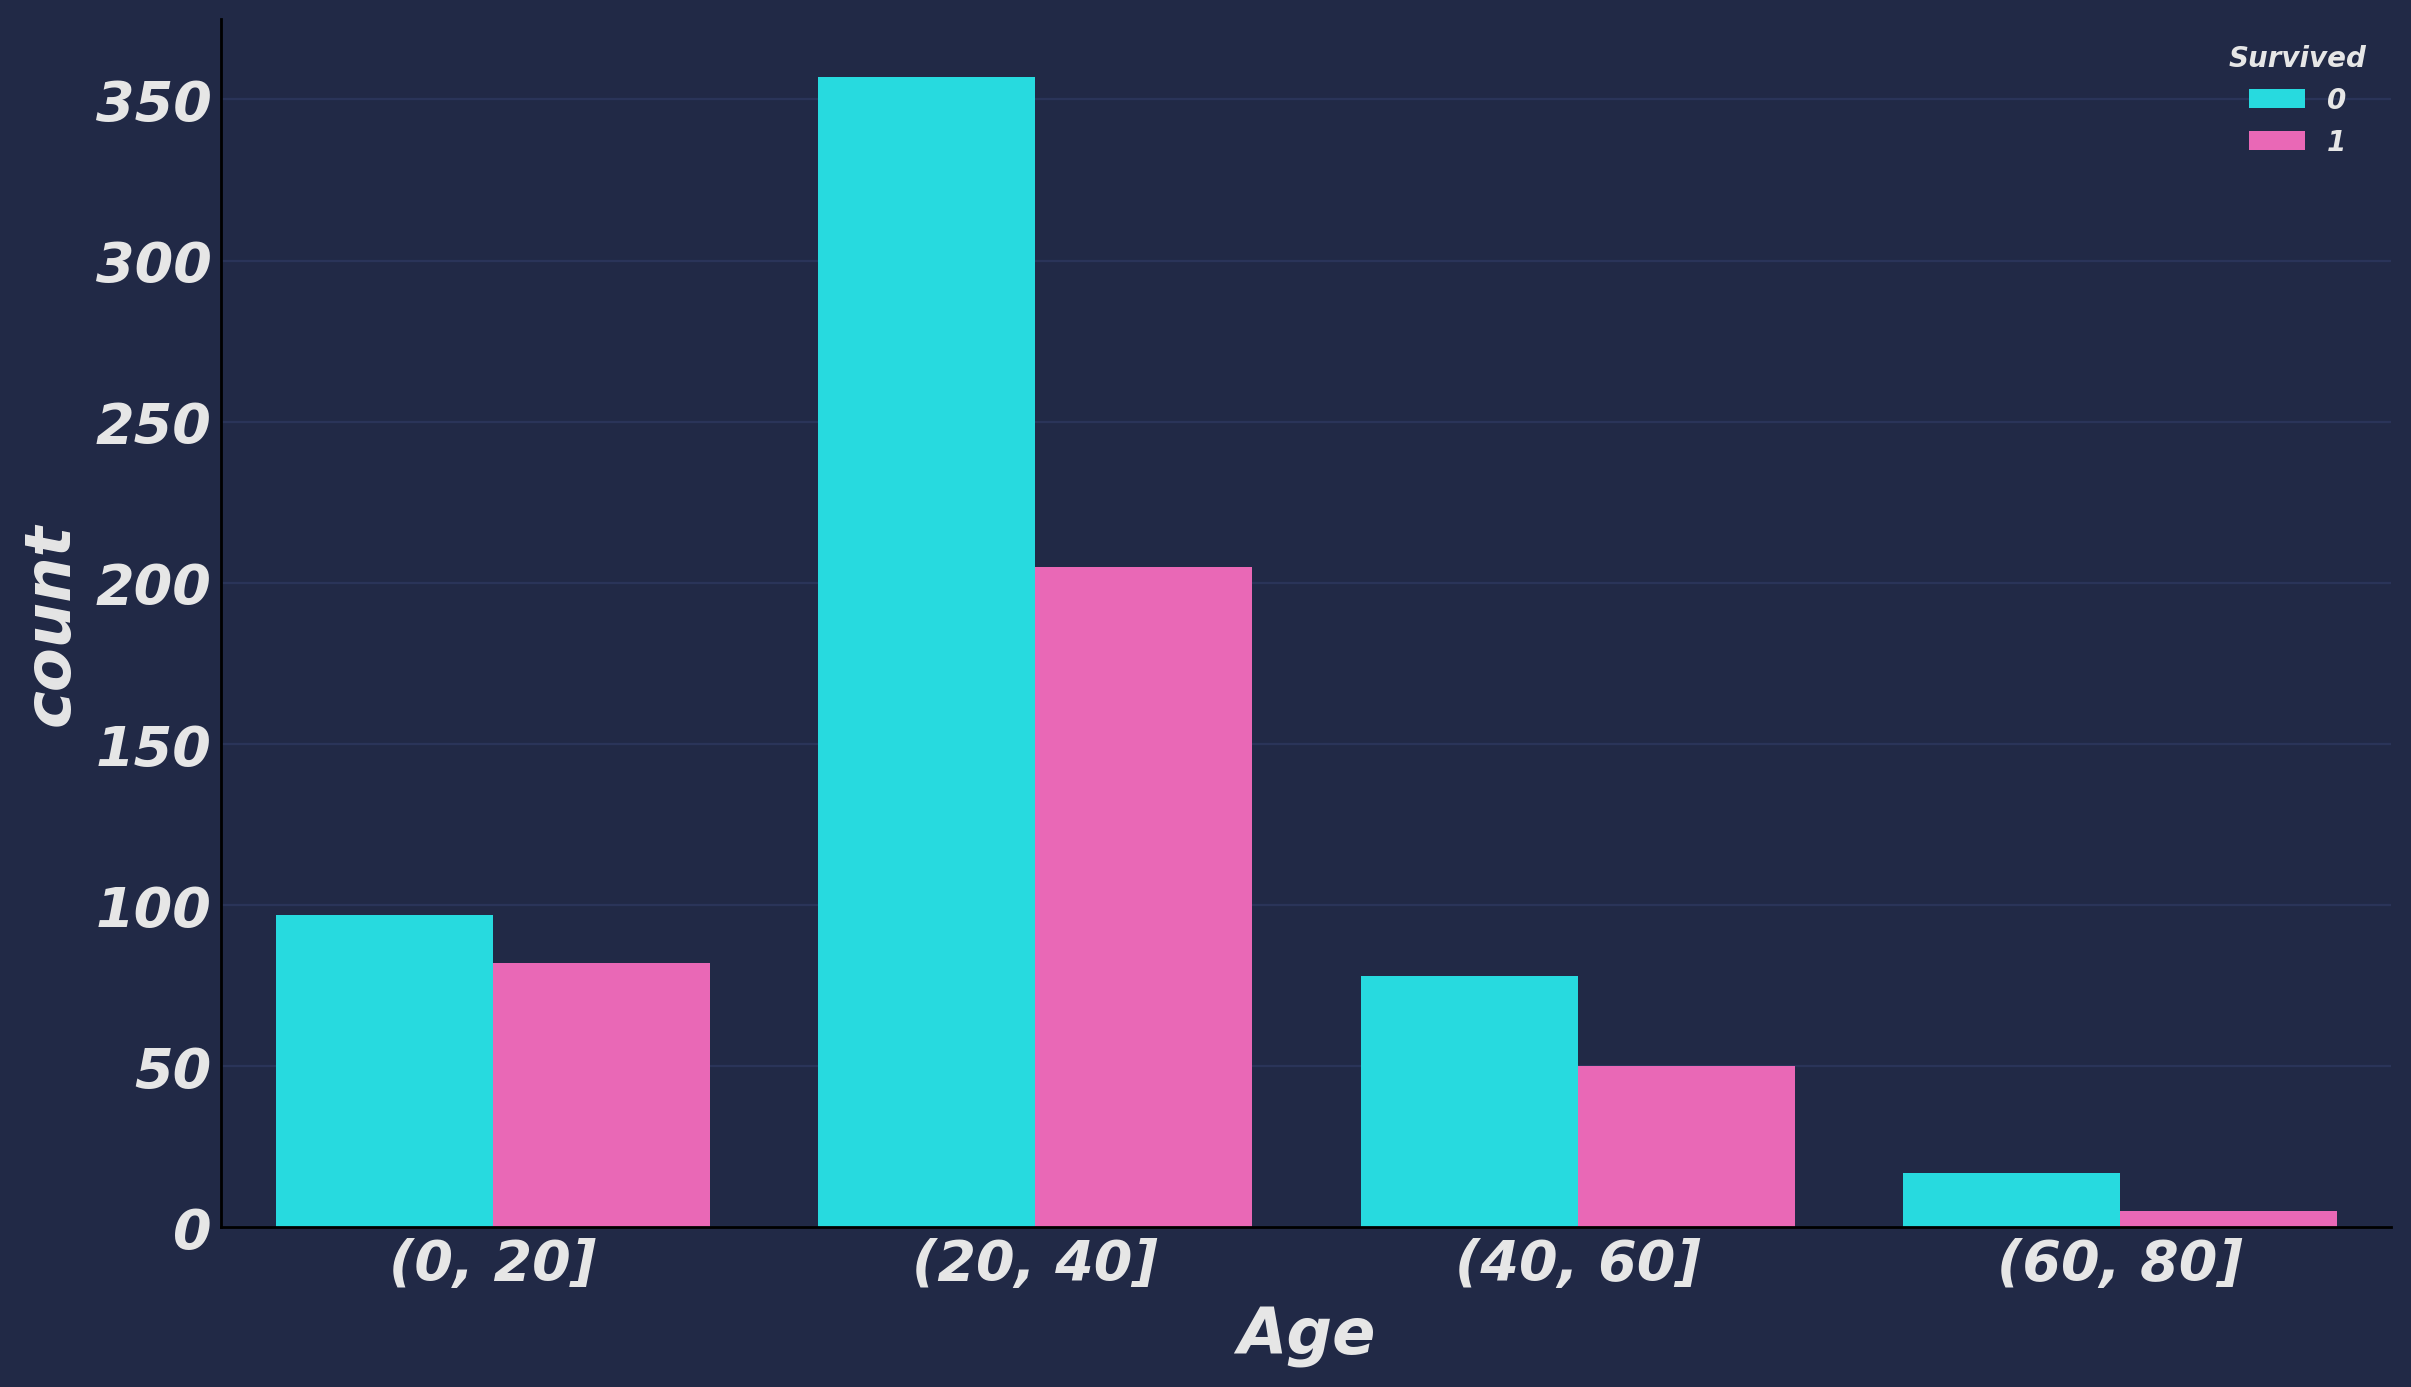

In [49]:
plt.figure(figsize=(14,8))
sns.countplot(age_bin,hue=train.Survived)

In [18]:
for i in [train,test]:
    i["age_bin"] = pd.cut(i.Age, bins=bin, labels=label) 

In [ ]:
#SibSp Parch 

In [19]:
#buat family_size
for i in [train,test]:
    i["Family_size"] = i["SibSp"] + i["Parch"] + 1

In [21]:
train.Family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [23]:
train.groupby("Family_size")["Survived"].value_counts(normalize=True).to_frame()

Survived
Family_size Survived          
1           0         0.696462
            1         0.303538
2           1         0.552795
            0         0.447205
3           1         0.578431
            0         0.421569
4           1         0.724138
            0         0.275862
5           0         0.800000
            1         0.200000
6           0         0.863636
            1         0.136364
7           0         0.666667
            1         0.333333
8           0         1.000000
11          0         1.000000

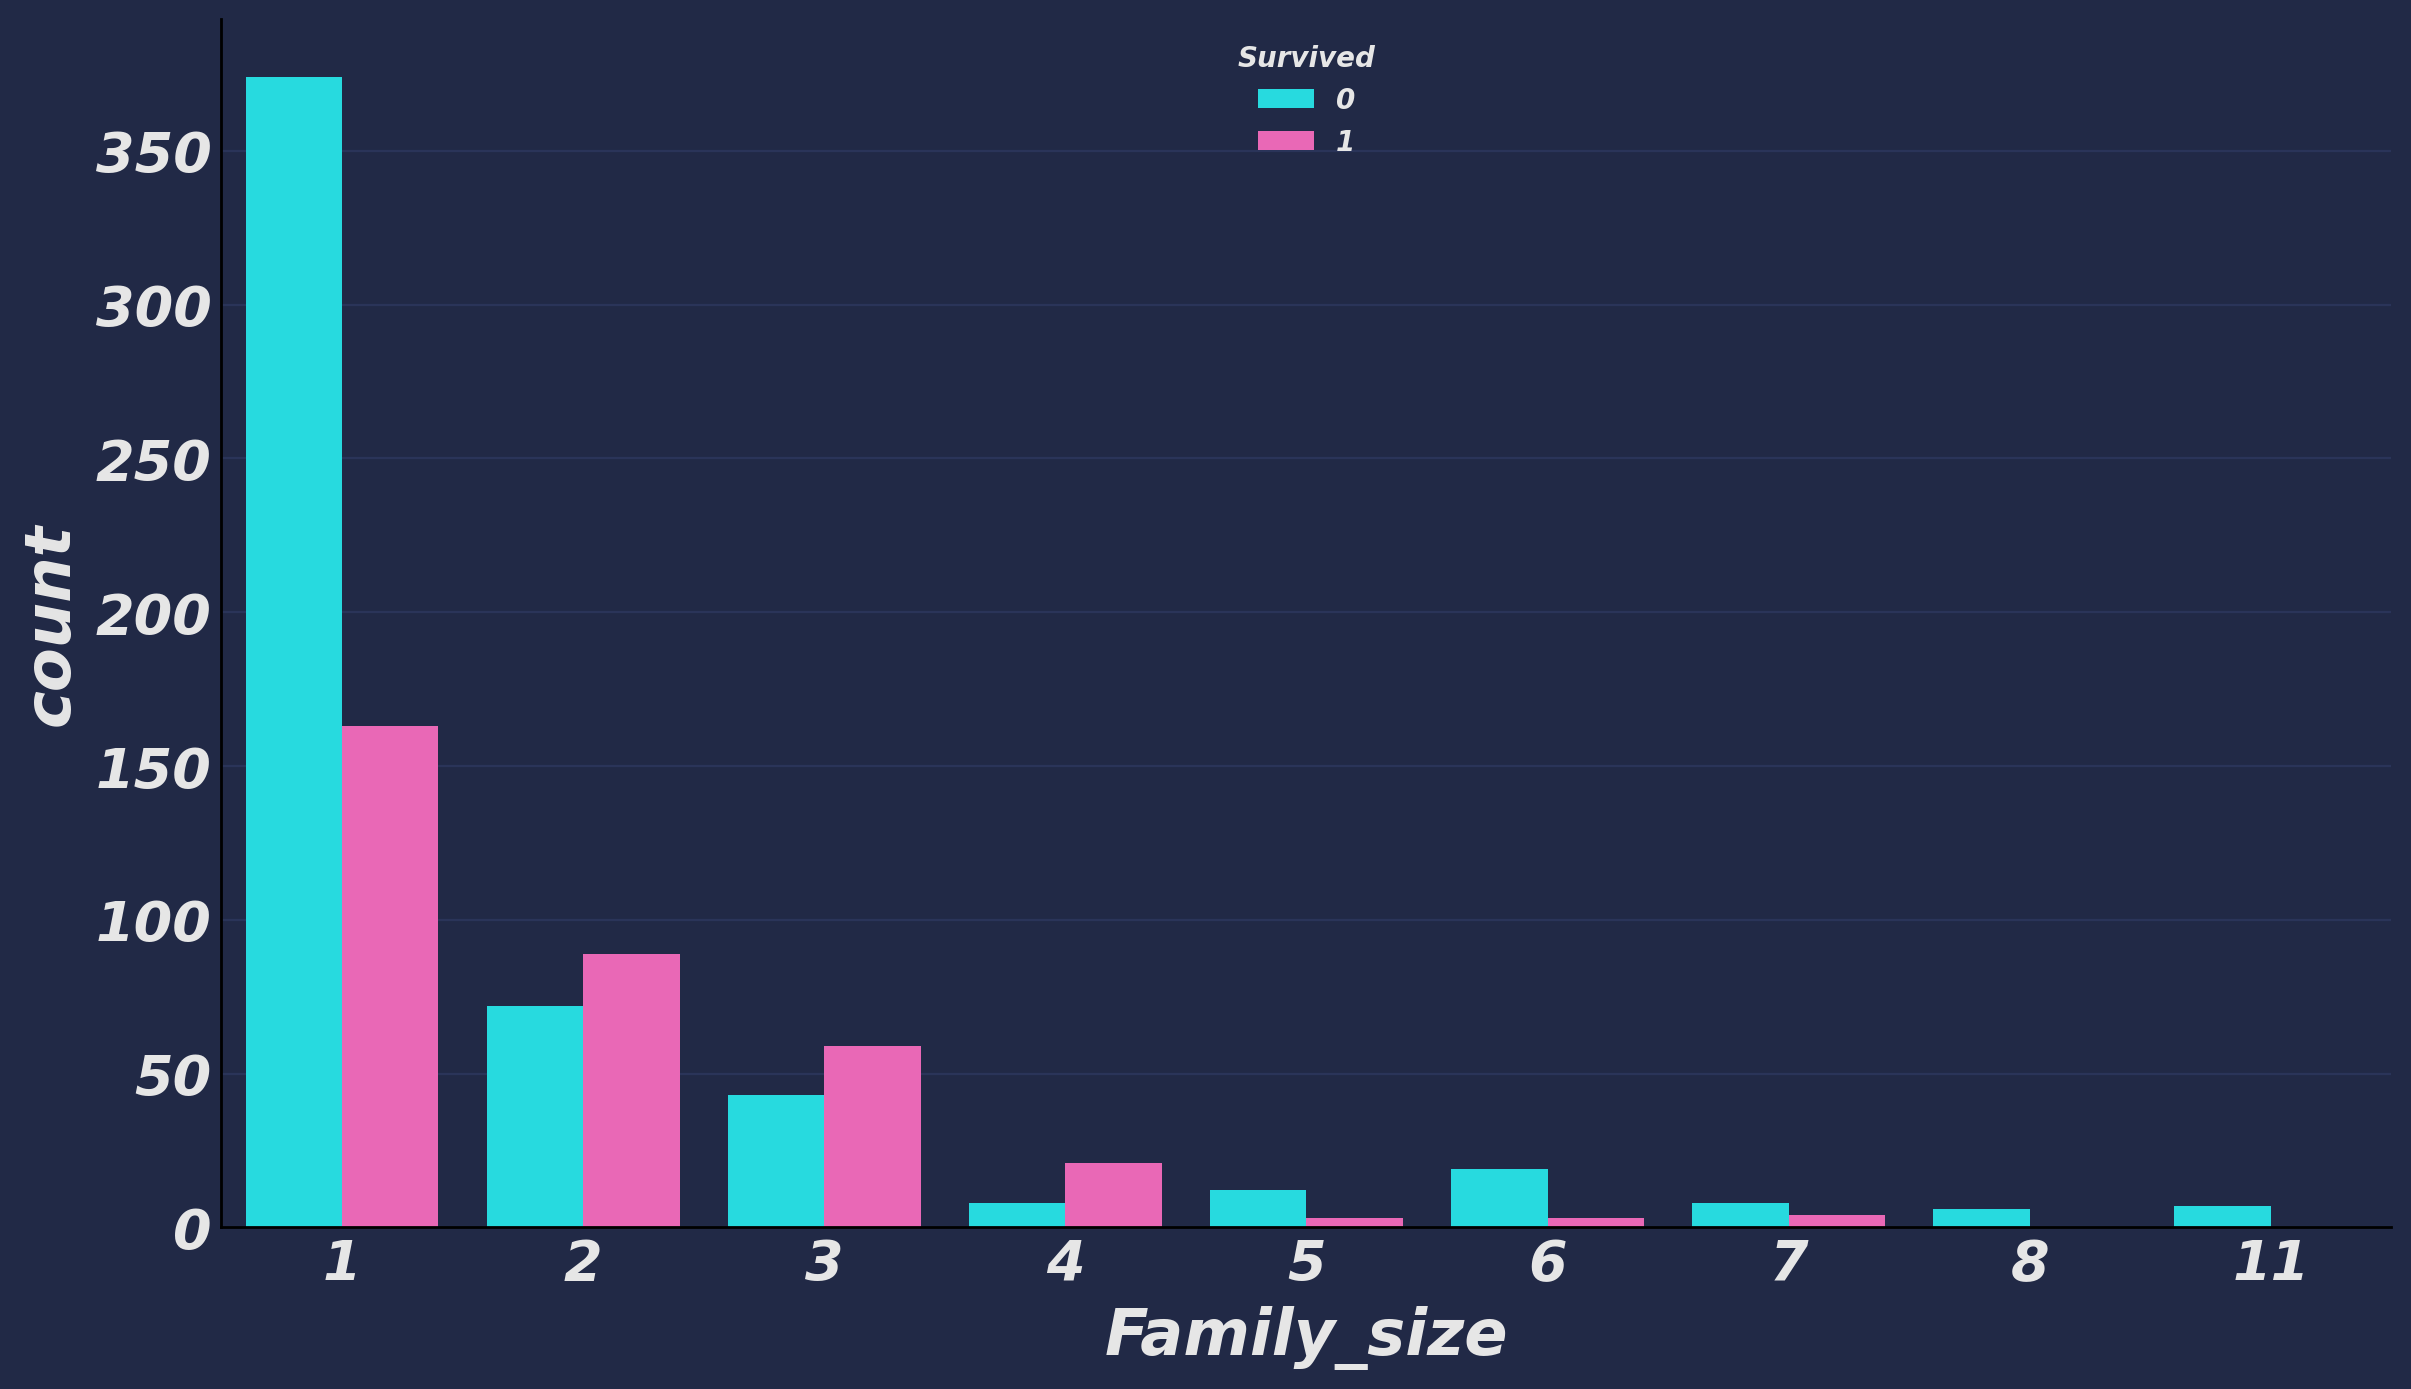

In [27]:
plt.figure(figsize=(14,8))
sns.countplot(train.Family_size,hue=train.Survived)

In [26]:
train.groupby(["Sex","Family_size"])["Survived"].mean().to_frame()

Survived
Sex    Family_size          
female 1            0.785714
       2            0.816092
       3            0.775510
       4            0.842105
       5            0.250000
       6            0.375000
       7            0.375000
       8            0.000000
       11           0.000000
male   1            0.155718
       2            0.243243
       3            0.396226
       4            0.500000
       5            0.000000
       6            0.000000
       7            0.250000
       8            0.000000
       11           0.000000

In [31]:
isalone = train.Family_size.apply(lambda x: "Yes" if x == 1 else "No") 

In [32]:
pd.crosstab(isalone,train.Survived,normalize=True)

Survived,0,1
Family_size,,
No,0.196409,0.200898
Yes,0.419753,0.182941


In [20]:
for i in [train,test]:
    i["isalone"] = i.Family_size.apply(lambda x: "Yes" if x == 1 else "No") 

In [34]:
train.groupby(["Sex","isalone"])["Survived"].mean().to_frame()

Survived
Sex    isalone          
female No       0.712766
       Yes      0.785714
male   No       0.271084
       Yes      0.155718

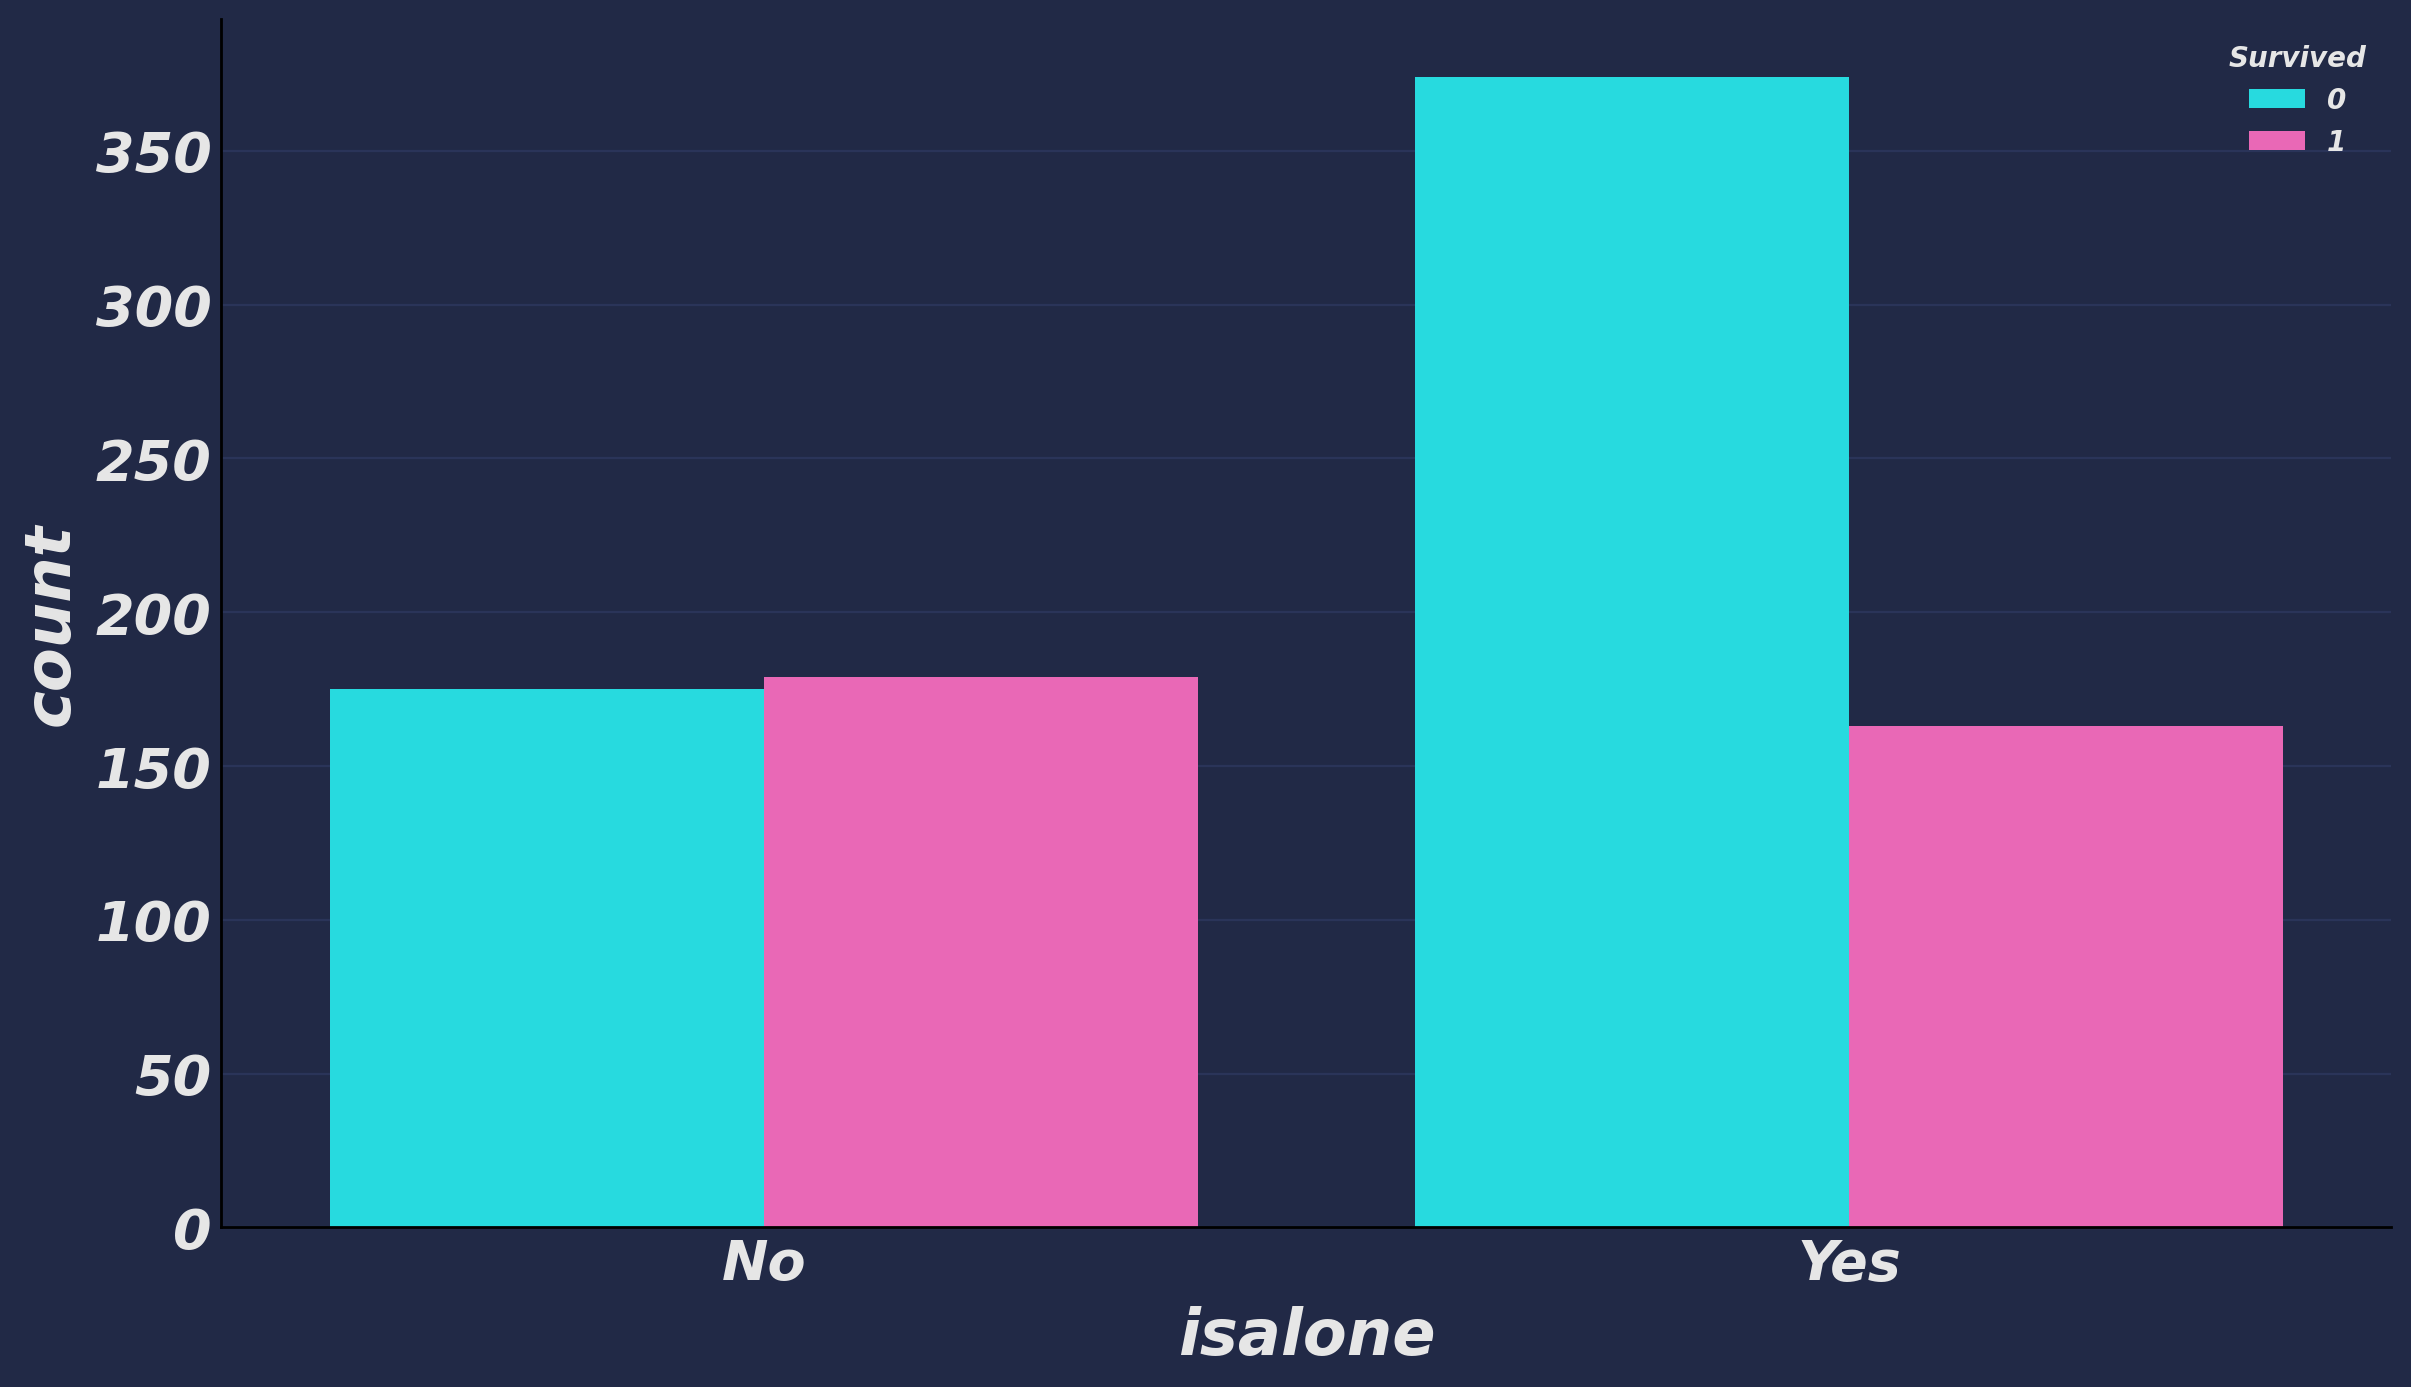

In [38]:
plt.figure(figsize=(14,8))
sns.countplot(train.isalone,hue=train.Survived)

In [ ]:
#fare

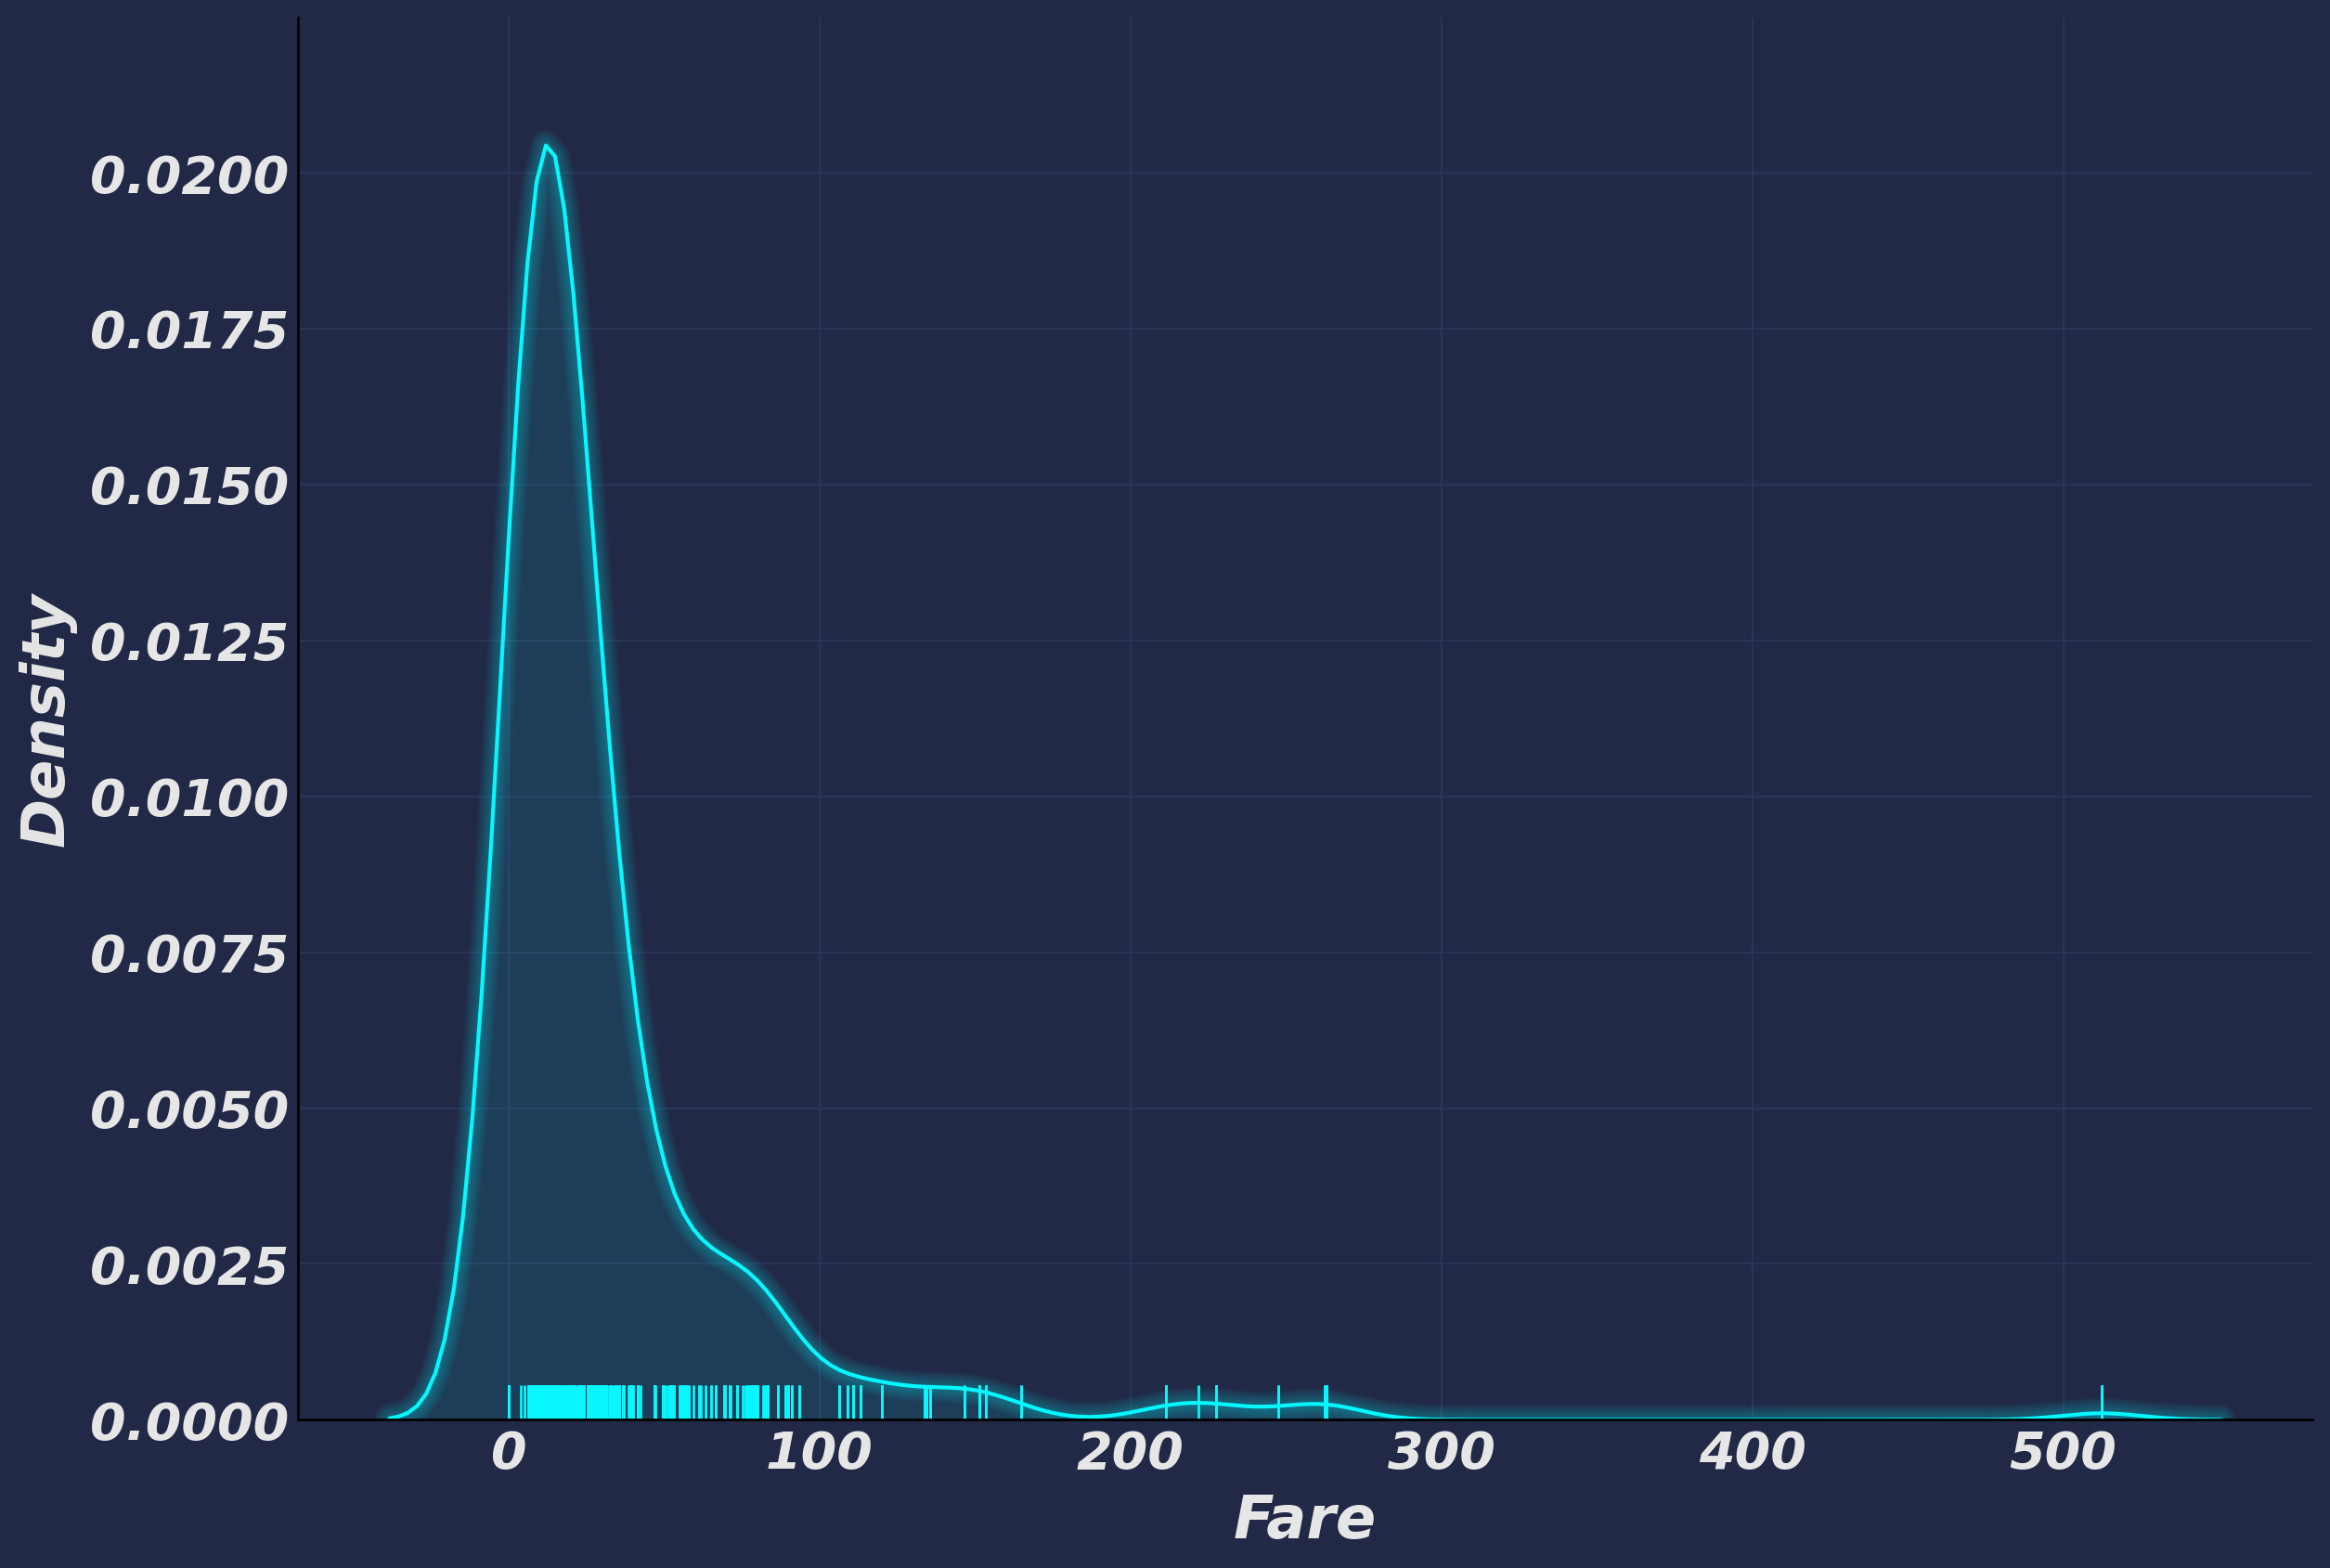

In [48]:
plt.figure(figsize=(14, 10))

sns.distplot(train.Fare,hist=False,rug=True)

mplcyberpunk.add_glow_effects() 

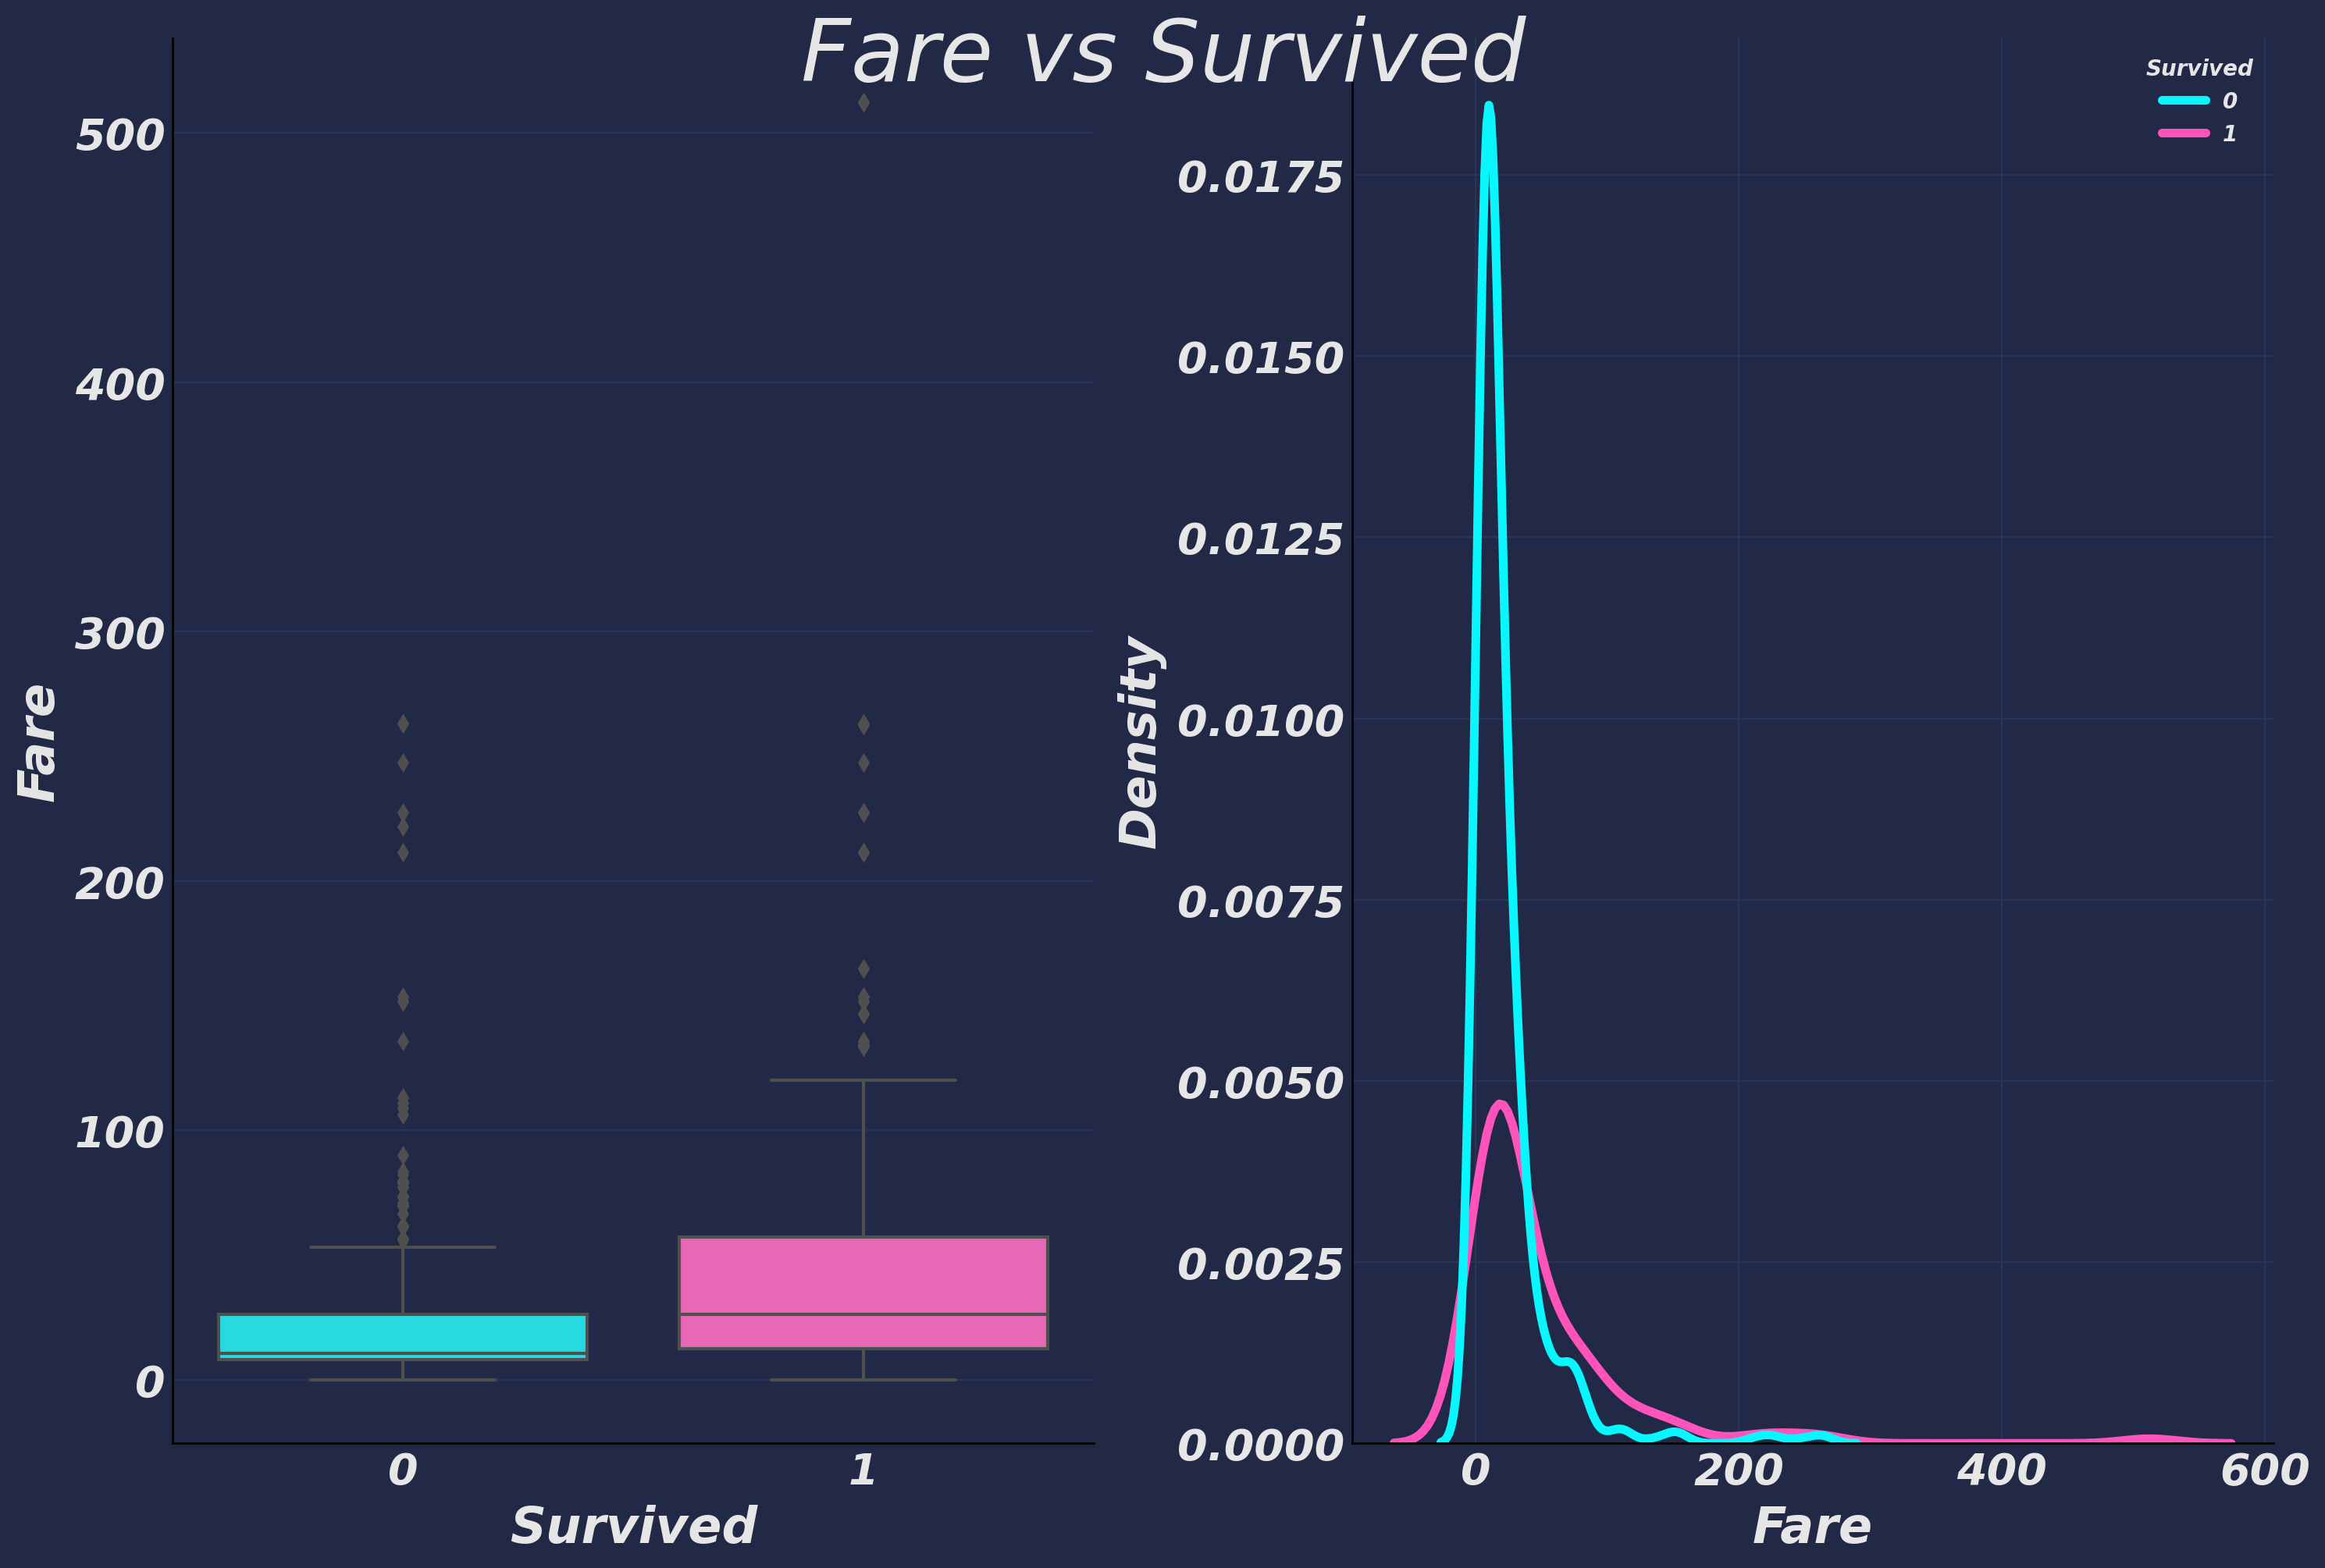

In [42]:
plt.figure(figsize=(15,10))

plt.subplot(121)
sns.boxplot(x=train.Survived, y=train.Fare)

plt.subplot(122)
sns.kdeplot(train.Fare,hue=train.Survived,linewidth=4)

plt.suptitle("Fare vs Survived",size=40,y=1)
plt.tight_layout() 
plt.show() 

In [56]:
female_fare = train.loc[train.Sex == "female", "Fare"].describe().to_frame()

male_fare = train.loc[train.Sex == "male", "Fare"].describe().to_frame()

pd.concat([female_fare,male_fare],keys = ["female","male"],axis=1) 

,female,male
,Fare,Fare
count,314.000000,577.000000
mean,44.479818,25.523893
std,57.997698,43.138263
min,6.750000,0.000000
25%,12.071875,7.895800
50%,23.000000,10.500000
75%,55.000000,26.550000
max,512.329200,512.329200


In [122]:
train.groupby(["Pclass","Survived"])["Fare"].mean().to_frame()

Fare
Pclass Survived           
1      0         64.684008
       1         95.608029
2      0         19.412328
       1         22.055700
3      0         13.669364
       1         13.694887

In [21]:
for i in [train,test]:
    i["Fare"] = i["Fare"].fillna(train["Fare"].median()) 

In [22]:
labels = ["low","medium","high"]
cut_fare = pd.qcut(train.Fare,3,labels=labels)
cut_fare.value_counts()

low       308
high      295
medium    288
Name: Fare, dtype: int64

In [64]:
pd.crosstab(cut_fare,train.Survived,normalize=True)

Survived,0,1
Fare,,
low,0.277217,0.068462
medium,0.193042,0.130191
high,0.145903,0.185185


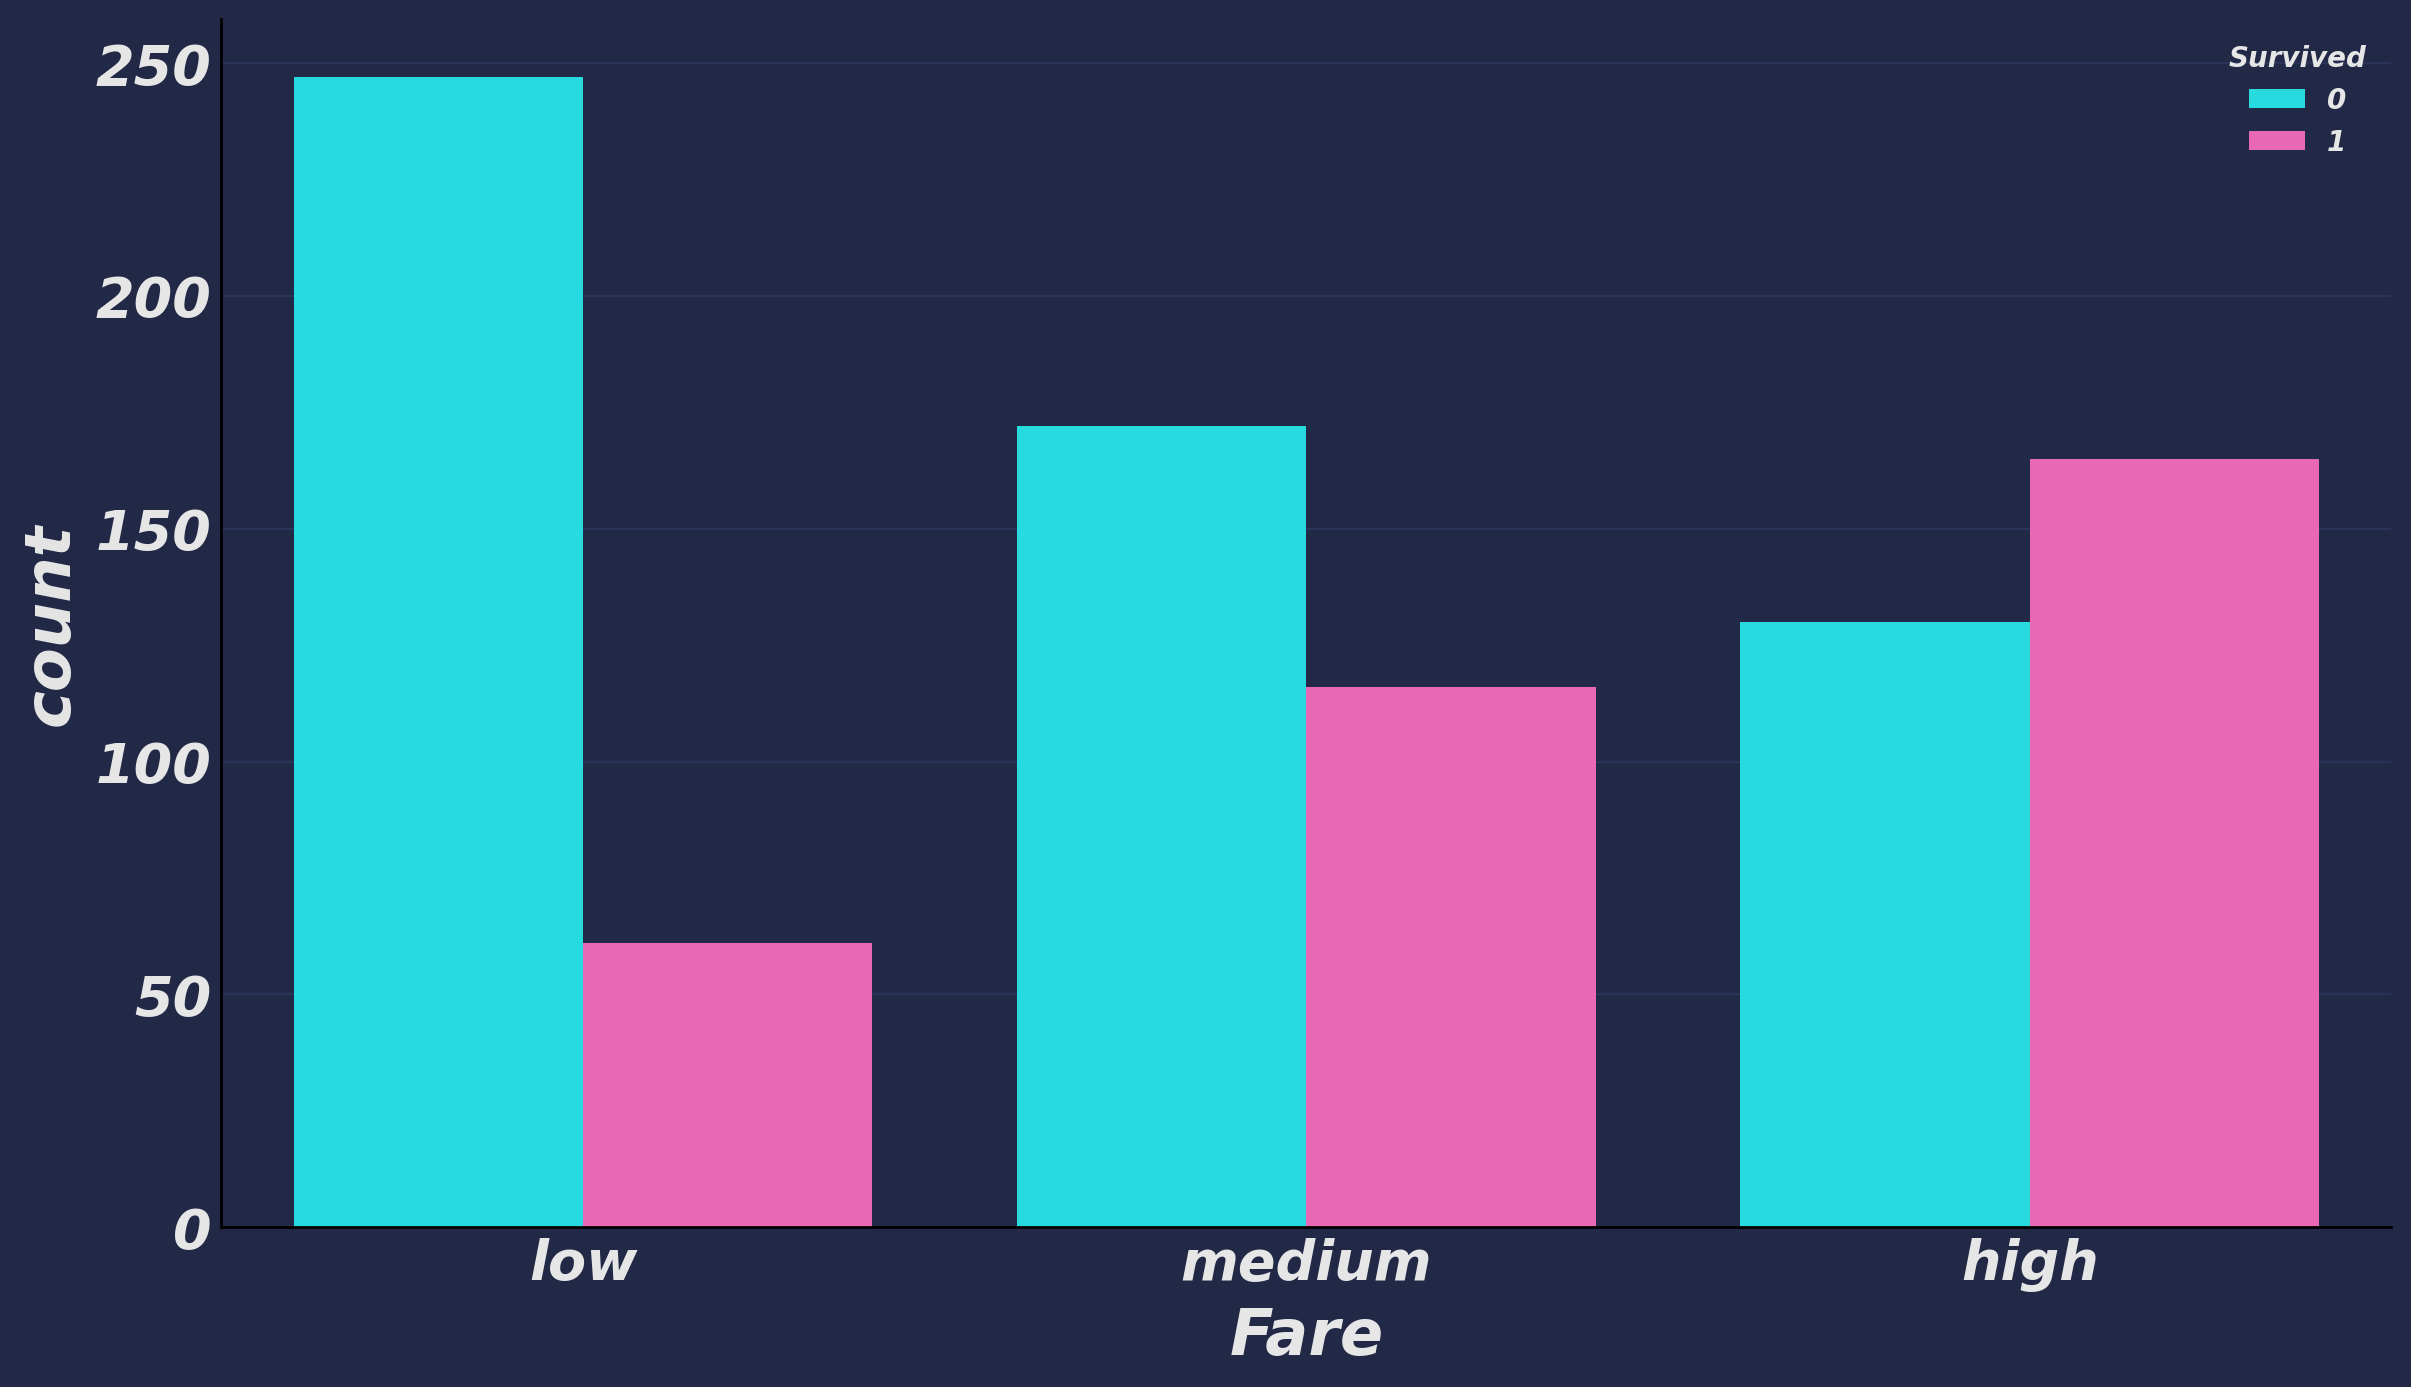

In [67]:
plt.figure(figsize=(14,8))
sns.countplot(cut_fare,hue=train.Survived)

In [23]:
for i in [train,test]:
    i["cut_fare"] = pd.qcut(i.Fare, 3,labels=labels)

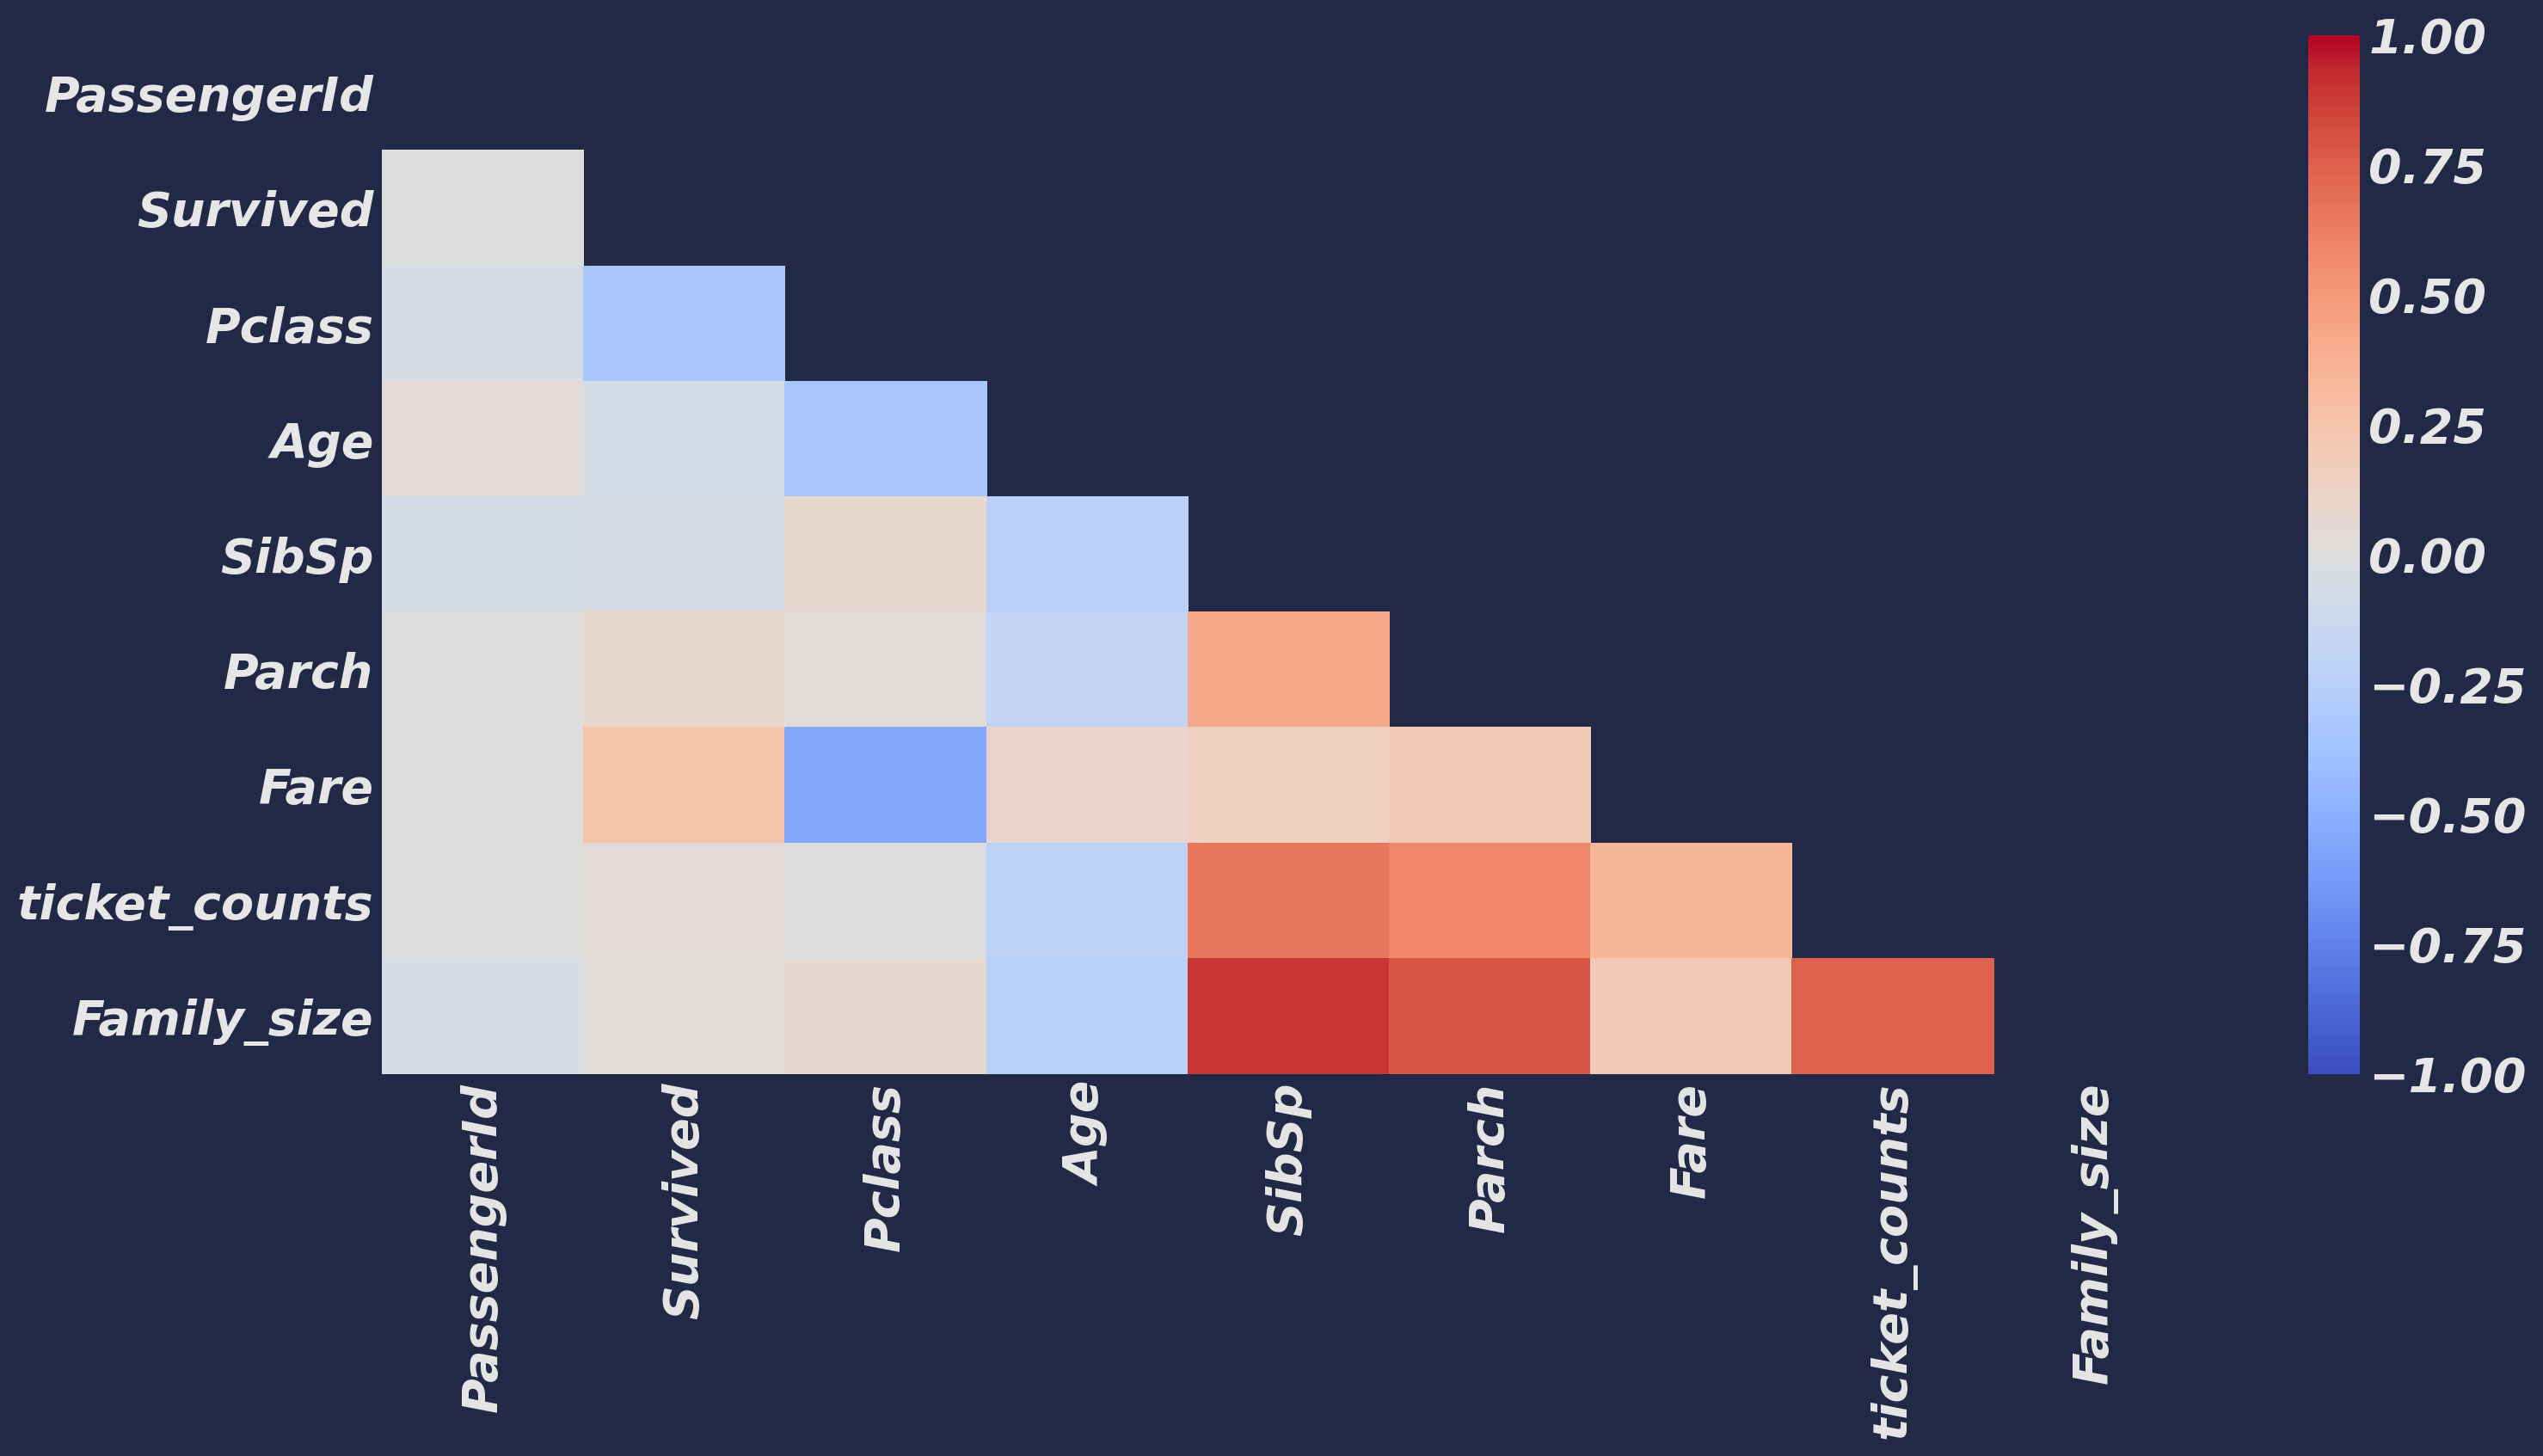

In [123]:
#check correlation 

plt.figure(figsize=(17,8)) 
sns.heatmap(train.corr(),mask=np.triu(train.corr()),cmap="coolwarm",vmin=-1,vmax=1)

In [ ]:
#sedikit feature engineering

In [32]:
train.sample(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_name,ticket_counts,has_cabin,age_bin,Family_size,isalone,cut_fare
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,M,S,Mr,1,No,40-60,1,Yes,medium
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,M,S,Mr,1,No,20-40,1,Yes,low
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,M,S,Mr,1,No,20-40,1,Yes,medium
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S,Mr,1,Yes,0-20,2,No,high
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,Mrs,1,Yes,40-60,1,Yes,medium
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,M,S,Mr,1,No,0-20,1,Yes,low
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,4,Yes,20-40,6,No,high
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S,Mr,2,Yes,20-40,2,No,high
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,M,S,Mr,1,No,20-40,1,Yes,low
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,Yes,0-20,1,Yes,high


In [46]:
lo = train.Fare//train.Family_size
lo.astype("int").nlargest()

258    512
737    512
679    256
380    227
557    227
dtype: int32

In [31]:
for i in [train,test]:
    i["Cabin"] = i["Cabin"].replace(np.nan,"M") 

In [33]:
train.Cabin.apply(lambda x: str(x)[0]).value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [34]:
for i in [train,test]:
    i["Deck"] = i.Cabin.apply(lambda x: str(x)[0]) 

In [41]:
train.groupby("Pclass")["Deck"].value_counts().to_frame()

Deck
Pclass Deck      
1      C       59
       B       47
       M       40
       D       29
       E       25
       A       16
2      M      168
       F        8
       D        4
       E        4
3      M      479
       F        5
       G        4
       E        3

In [40]:
for i in [train,test]:
    i.loc[i.Deck == "T", "Deck"] = "A"

In [42]:
deck_map = {"A": "ABC", "B": "ABC", 
            "C": "ABC", "D": "DE",
            "E": "DE", "F": "FG", 
            "G": "FG"}

In [44]:
for i in [train,test]:
    i["Deck"] = i.Deck.replace(deck_map) 

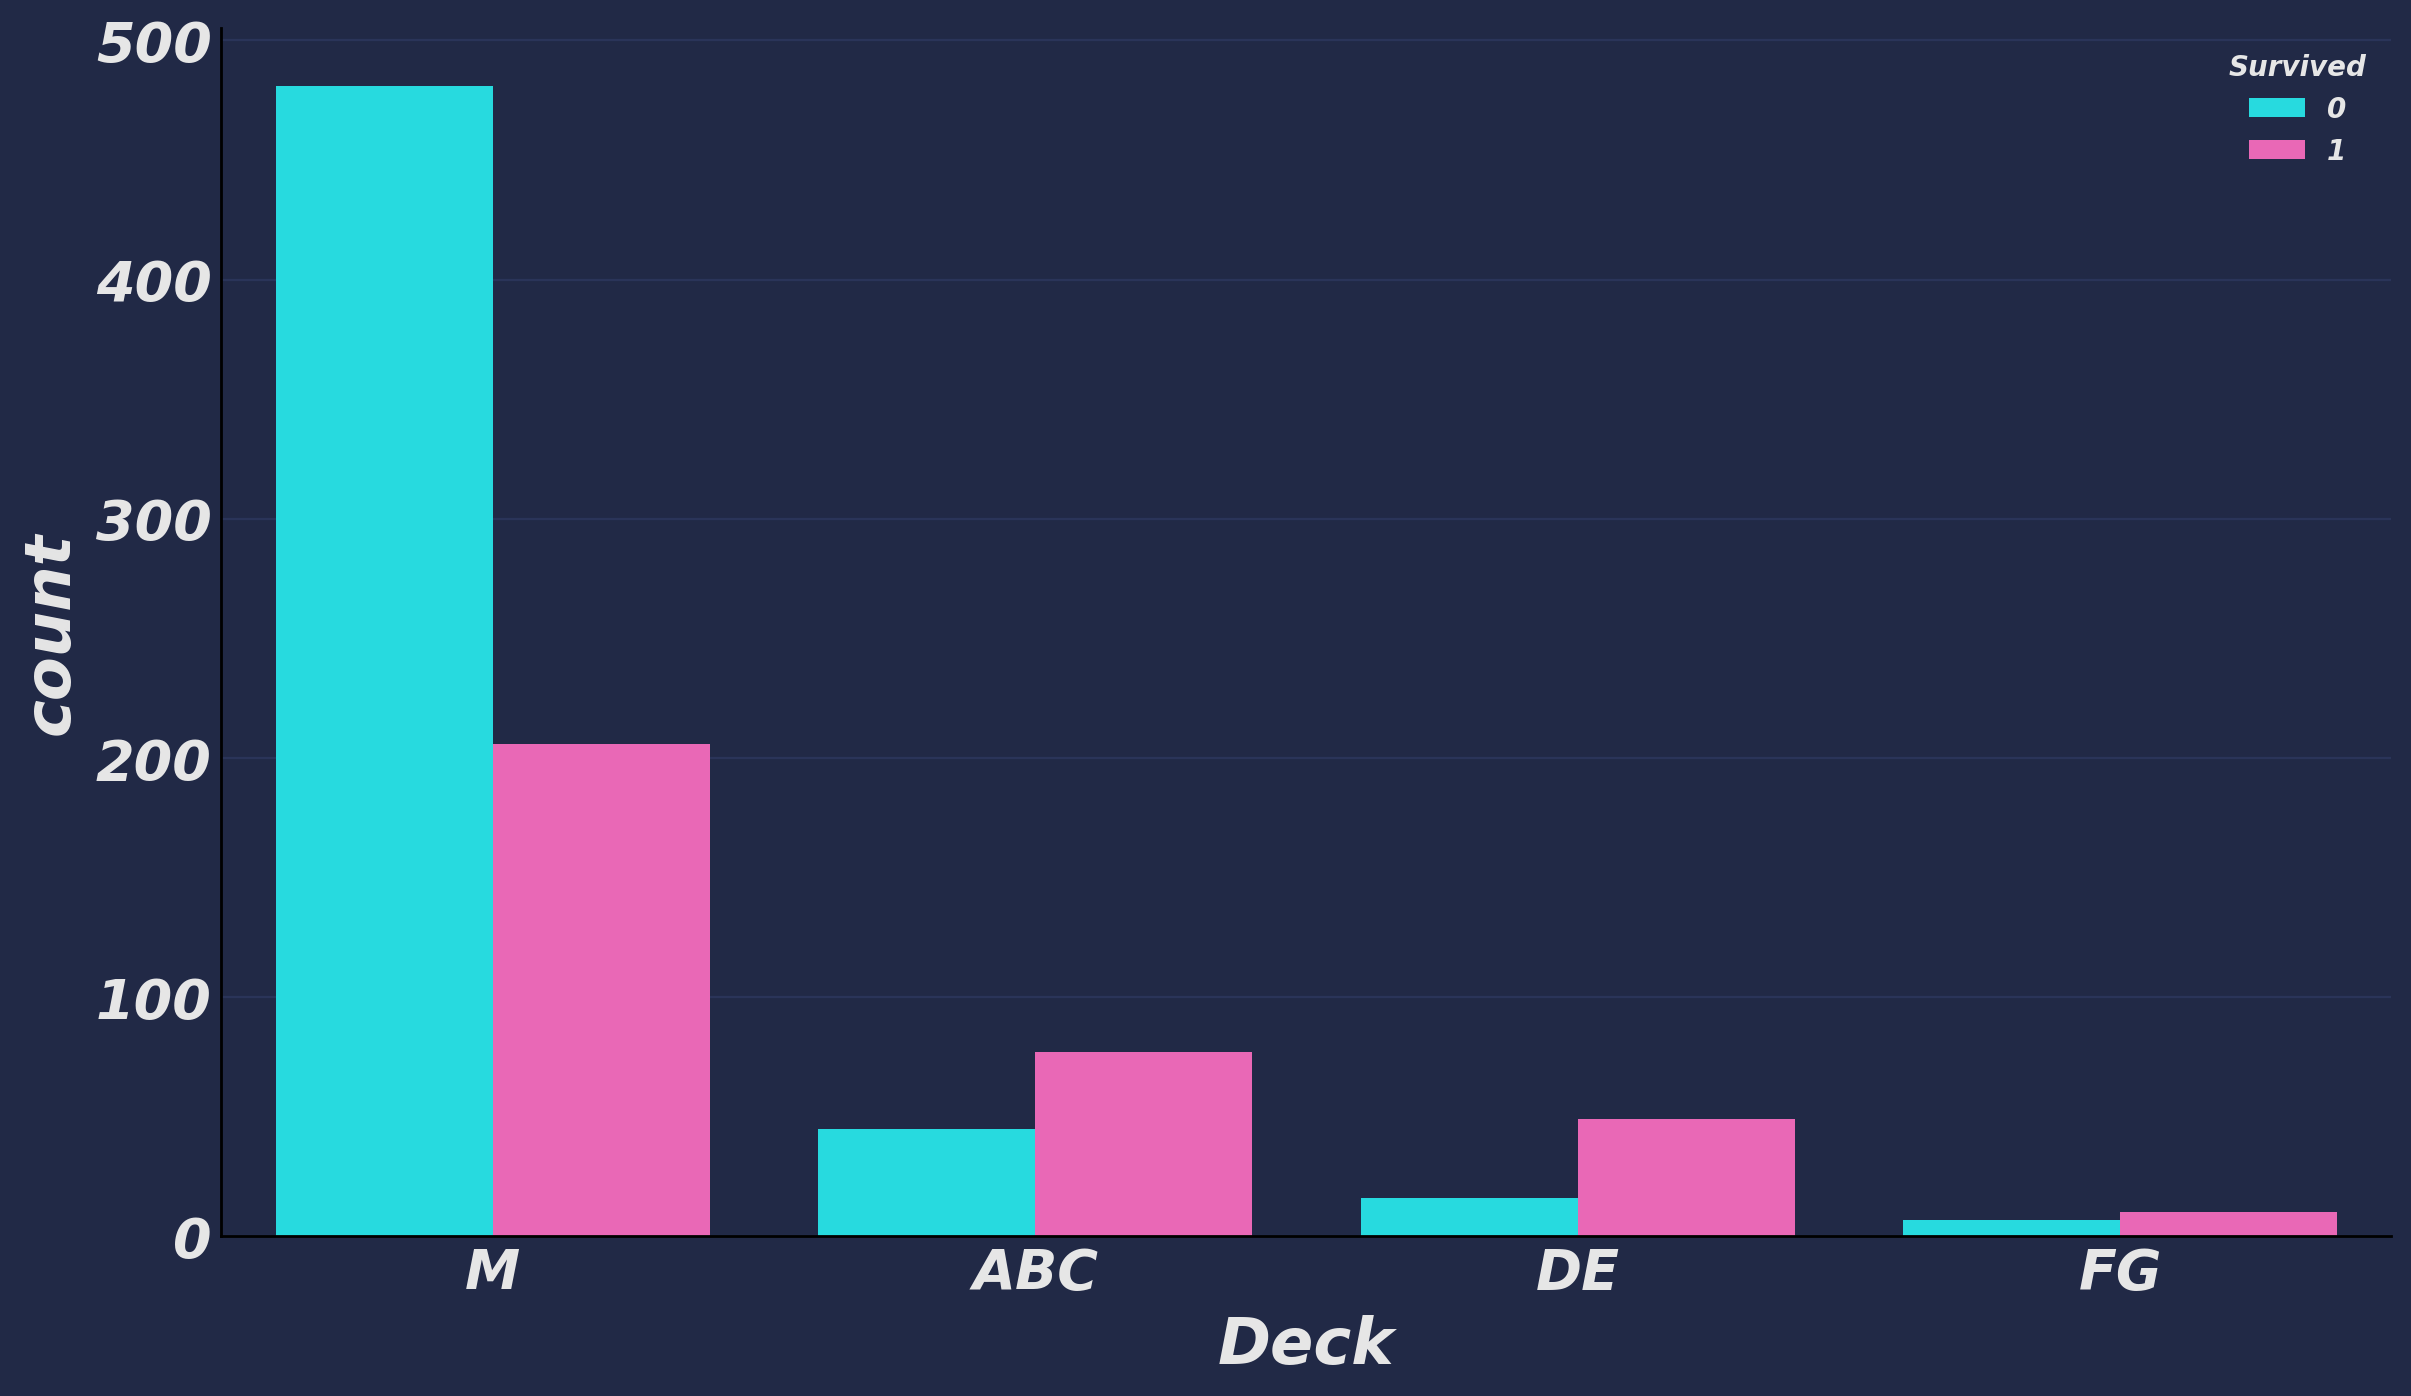

In [45]:
plt.figure(figsize=(14,8))
sns.countplot(train.Deck,hue=train.Survived)

In [47]:
train.Family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [48]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 
              4: 'Small', 5: 'Medium', 6: 'Medium', 
              7: 'Large', 8: 'Large', 11: 'Large'}

In [49]:
for i in [train,test]:
    i["Family_size"] = i.Family_size.map(family_map) 

In [50]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_name,ticket_counts,has_cabin,age_bin,Family_size,isalone,cut_fare,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,1,No,20-40,Small,No,low,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Yes,20-40,Small,No,high,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Miss,1,No,20-40,Alone,Yes,low,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Yes,20-40,Small,No,high,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,1,No,20-40,Alone,Yes,low,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,Other,1,No,20-40,Alone,Yes,medium,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,Yes,0-20,Alone,Yes,high,ABC
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,M,S,Miss,2,No,20-40,Small,No,medium,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,Yes,20-40,Alone,Yes,high,ABC


In [ ]:
#final

In [68]:
col_drop = ["PassengerId","Name","Age",
            "SibSp", "Parch", "Ticket", 
            "Fare", "Cabin"]

In [69]:
for i in [train,test]:
    i.drop(col_drop, axis=1, inplace=True) 

In [70]:
train.head()

,Survived,Pclass,Sex,Embarked,title_name,ticket_counts,has_cabin,age_bin,Family_size,isalone,cut_fare,Deck
0,0,3,male,S,Mr,1,No,20-40,Small,No,low,M
1,1,1,female,C,Mrs,1,Yes,20-40,Small,No,high,ABC
2,1,3,female,S,Miss,1,No,20-40,Alone,Yes,low,M
3,1,1,female,S,Mrs,2,Yes,20-40,Small,No,high,ABC
4,0,3,male,S,Mr,1,No,20-40,Alone,Yes,low,M


In [74]:
print(train.shape)
print(test.shape)
print("") 
print(train.isnull().any())
print(test.isnull().any()) 

(891, 12)
(418, 11)

Survived         False
Pclass           False
Sex              False
Embarked         False
title_name       False
ticket_counts    False
has_cabin        False
age_bin          False
Family_size      False
isalone          False
cut_fare         False
Deck             False
dtype: bool
Pclass           False
Sex              False
Embarked         False
title_name       False
ticket_counts    False
has_cabin        False
age_bin          False
Family_size      False
isalone          False
cut_fare         False
Deck             False
dtype: bool


In [75]:
train.to_csv("train_titanic(clean).csv",index=False)
test.to_csv("test_titanic(clean).csv",index=False)